# Diabetes - Classification
        


## James Machine learning Project


Link to database: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

## Preaparing Data

### Importing relevant libraries required

In [1]:
import pandas as pd
import numpy as np

#Graph libraries
import seaborn as sns
import matplotlib.pyplot as plt


### Loading data set and reading first 5 rows

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Renaming Columns

In [5]:
diabetes_df = diabetes_df.rename({'Pregnancies': 'preg',
                                    'Glucose':'glucose',
                                    'BloodPressure': 'bp',
                                    'SkinThickness': 'skin',
                                    'Insulin': 'insulin',
                                    'BMI': 'bmi',
                                    'DiabetesPedigreeFunction':'dpf',
                                    'Age':'age',
                                    'Outcome': 'outcome'
                                   }
                                   , axis = 1)
diabetes_df

preg  glucose  bp  skin  insulin   bmi    dpf  age  outcome
0       6      148  72    35        0  33.6  0.627   50        1
1       1       85  66    29        0  26.6  0.351   31        0
2       8      183  64     0        0  23.3  0.672   32        1
3       1       89  66    23       94  28.1  0.167   21        0
4       0      137  40    35      168  43.1  2.288   33        1
..    ...      ...  ..   ...      ...   ...    ...  ...      ...
763    10      101  76    48      180  32.9  0.171   63        0
764     2      122  70    27        0  36.8  0.340   27        0
765     5      121  72    23      112  26.2  0.245   30        0
766     1      126  60     0        0  30.1  0.349   47        1
767     1       93  70    31        0  30.4  0.315   23        0

[768 rows x 9 columns]

### Overall statistic of the data set

In [6]:
diabetes_df.describe()

preg     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              dpf         age     outcome  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [7]:
for i in diabetes_df.iloc[:,[1,2,3,4,5]]:
    diabetes_df[i] = diabetes_df[i].replace(0, diabetes_df[i].mean())

### Checking for missing values in the data set

In [8]:
diabetes_df.isnull().sum()

preg       0
glucose    0
bp         0
skin       0
insulin    0
bmi        0
dpf        0
age        0
outcome    0
dtype: int64

### Checking information of the data set

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   glucose  768 non-null    float64
 2   bp       768 non-null    float64
 3   skin     768 non-null    float64
 4   insulin  768 non-null    float64
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   outcome  768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There is no missing values in the dataset so therefore we can start on the visualisation


### Checking for multi-collinearity using variance inflation factor

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = diabetes_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(diabetes_df.values, i)
                          for i in range(len(diabetes_df.columns))]
  
print(vif_data) 

   feature        VIF
0     preg   3.366106
1  glucose  23.838302
2       bp  34.174956
3     skin  12.527034
4  insulin   3.309943
5      bmi  33.170313
6      dpf   3.200655
7      age  14.250021
8  outcome   2.011444


### Checking for Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

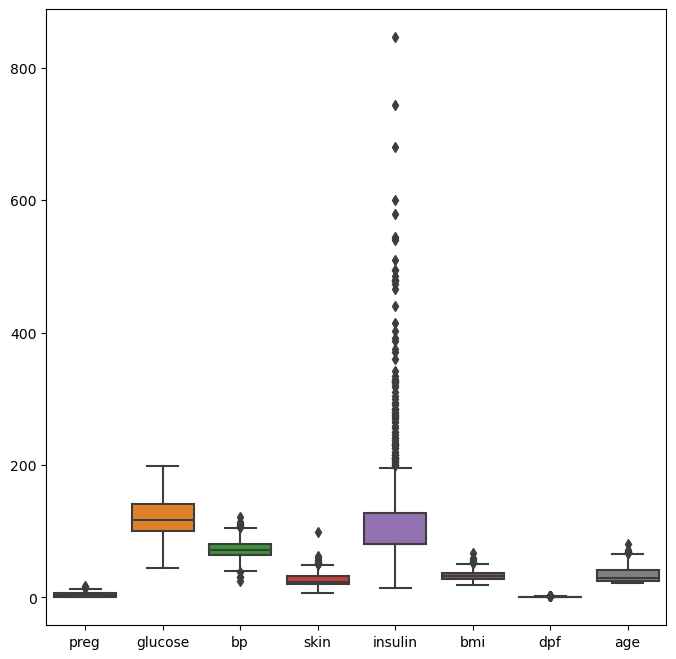

In [11]:
plt.figure(figsize = (8,8))
sns.boxplot(data = diabetes_df[["preg","glucose","bp","skin","insulin","bmi", "dpf", "age"]])
plt.show


In [12]:
for i in diabetes_df.columns:
    diabetes_df.sort_values(by=i,ascending=True,na_position='last')
    q1 = np.nanpercentile(diabetes_df[i],25)
    q3 = np.nanpercentile(diabetes_df[i],75)
    interquartile = q3 - q1
    upper_bound = q3+(interquartile*1.5)
    lower_bound = q1-(interquartile*1.5)
    outlier= diabetes_df[i][(diabetes_df[i] < lower_bound) | (diabetes_df[i] > upper_bound)]
    percentage = (outlier.count()/diabetes_df[i].count())*100
    print(f"{round(percentage,2)}% of the data in {i} are outliers, with a count of {outlier.count()}")

0.52% of the data in preg are outliers, with a count of 4
0.0% of the data in glucose are outliers, with a count of 0
1.82% of the data in bp are outliers, with a count of 14
1.56% of the data in skin are outliers, with a count of 12
11.59% of the data in insulin are outliers, with a count of 89
1.04% of the data in bmi are outliers, with a count of 8
3.78% of the data in dpf are outliers, with a count of 29
1.17% of the data in age are outliers, with a count of 9
0.0% of the data in outcome are outliers, with a count of 0


#### Using the MAD (Median Absolute Deviation) to replace outliers

In [13]:
#MAD for bp
median = diabetes_df['bp'].median()
mad = diabetes_df['bp'].mad()
lower_b = median - 3 * mad 
upper_b = median + 3 * mad
outliers = diabetes_df[(diabetes_df['bp'] < lower_b) | (diabetes_df['bp'] > upper_b)]
diabetes_df.loc[outliers.index, 'bp']  = median

C:\Users\James\AppData\Local\Temp\ipykernel_22072\2679764886.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = diabetes_df['bp'].mad()


In [14]:
#MAD for insulin
median = diabetes_df['insulin'].median()
mad = diabetes_df['insulin'].mad()
lower_b = median - 3 * mad 
upper_b = median + 3 * mad
outliers = diabetes_df[(diabetes_df['insulin'] < lower_b) | (diabetes_df['insulin'] > upper_b)]
diabetes_df.loc[outliers.index, 'insulin']  = median

C:\Users\James\AppData\Local\Temp\ipykernel_22072\3637789226.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = diabetes_df['insulin'].mad()


In [15]:
#MAD for dpf
median = diabetes_df['dpf'].median()
mad = diabetes_df['dpf'].mad()
lower_b = median - 3 * mad 
upper_b = median + 3 * mad
outliers = diabetes_df[(diabetes_df['dpf'] < lower_b) | (diabetes_df['dpf'] > upper_b)]
diabetes_df.loc[outliers.index, 'dpf']  = median

C:\Users\James\AppData\Local\Temp\ipykernel_22072\3116479800.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = diabetes_df['dpf'].mad()


<function matplotlib.pyplot.show(close=None, block=None)>

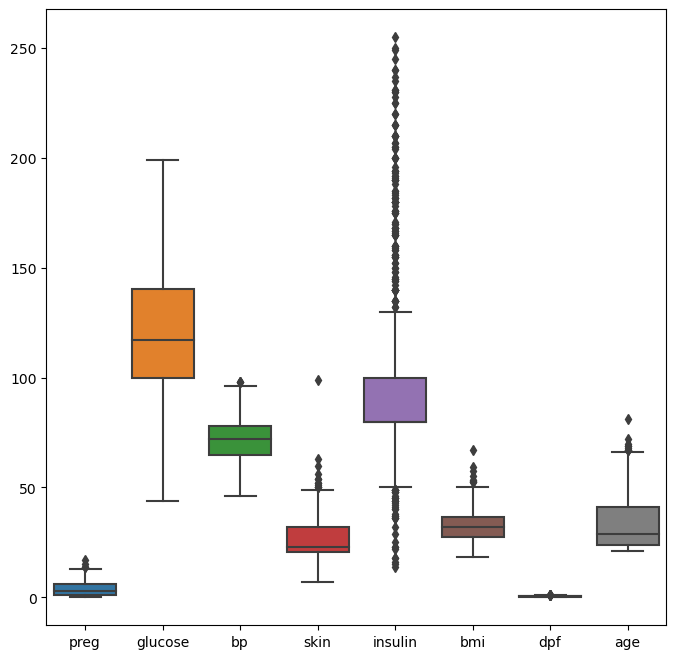

In [16]:
plt.figure(figsize = (8,8))
sns.boxplot(data = diabetes_df[["preg","glucose","bp","skin","insulin","bmi", "dpf", "age"]])
plt.show

## Data visualization

[Text(0, 0, '500'), Text(0, 0, '268')]

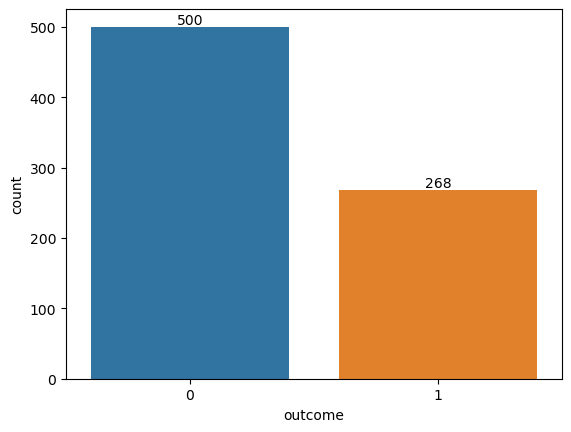

In [17]:
bar = sns.countplot(x = 'outcome', data = diabetes_df)
bar.bar_label(bar.containers[0])

### Heat Map

<Axes: >

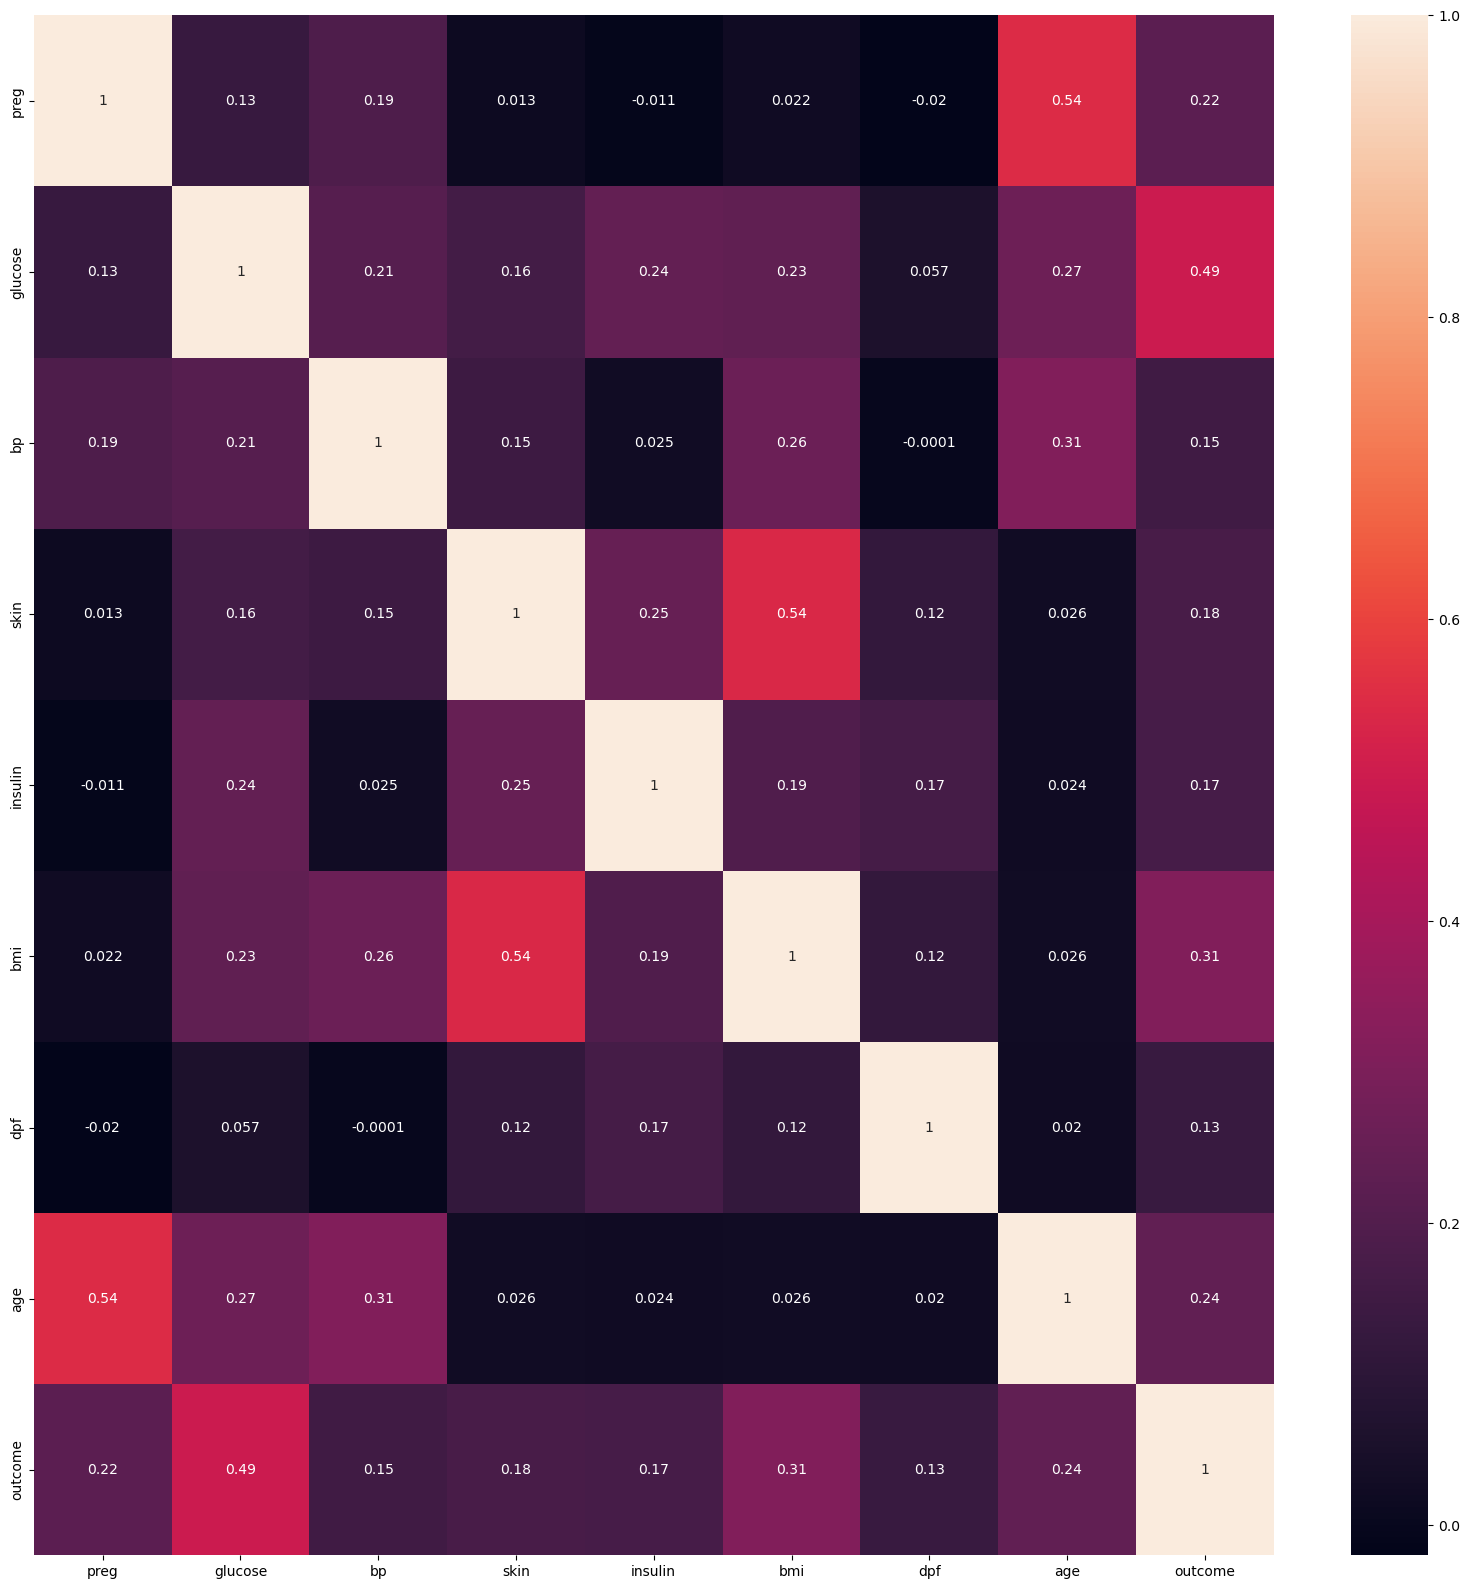

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(diabetes_df.corr(),annot=True)

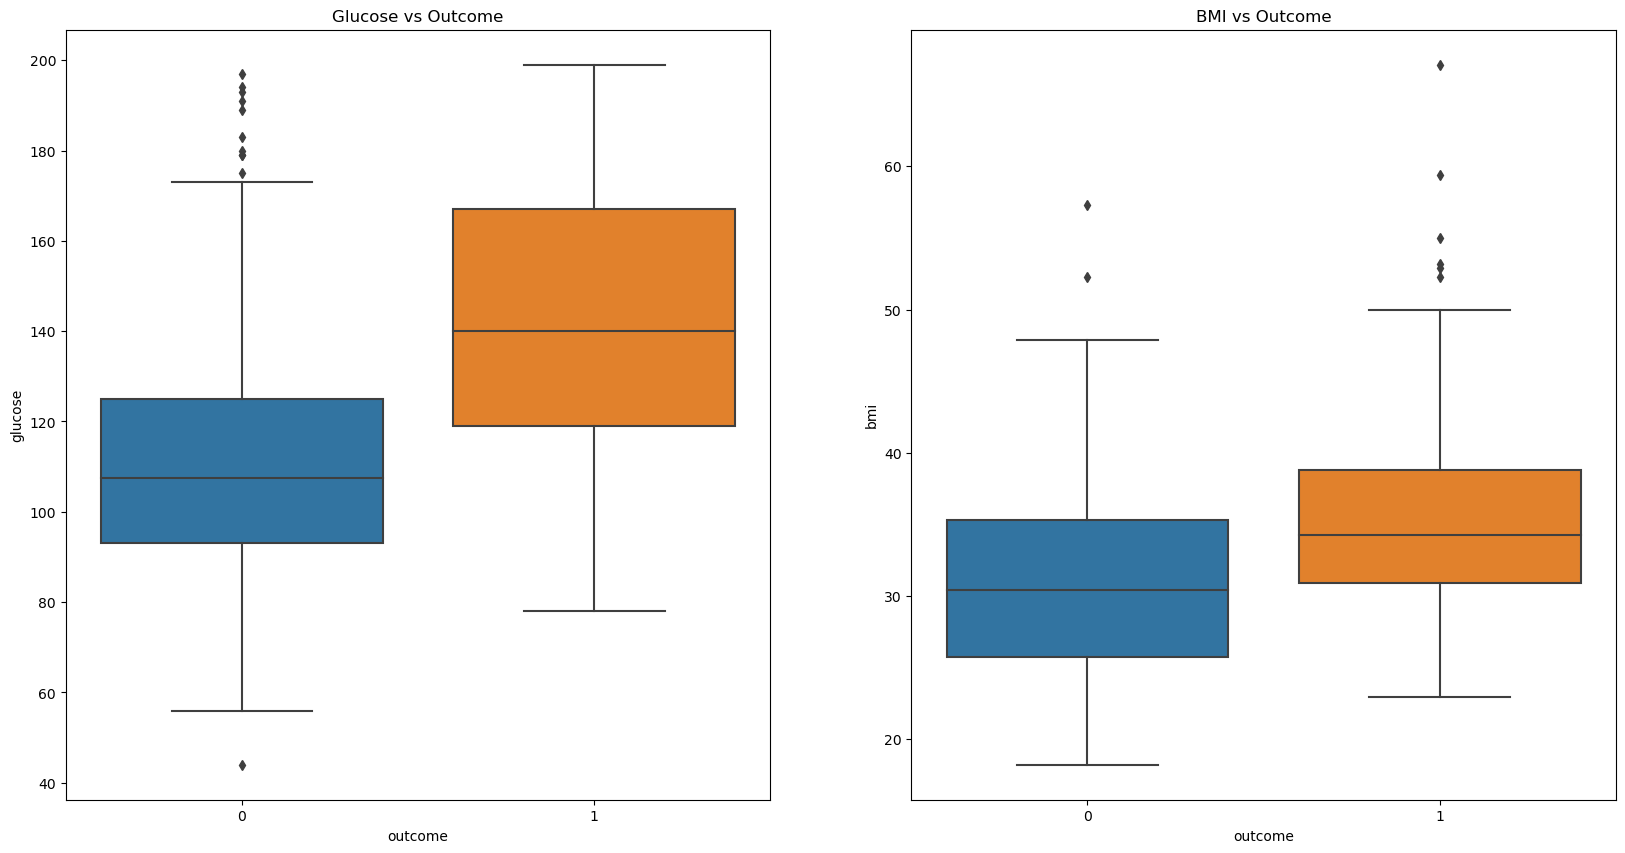

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,10))
glucose_plot = sns.boxplot(data=diabetes_df, x = 'outcome', y='glucose', ax = ax1)
glucose_plot.title.set_text("Glucose vs Outcome")

bmi_plot = sns.boxplot(data=diabetes_df, x = 'outcome', y='bmi', ax = ax2)
bmi_plot.title.set_text("BMI vs Outcome")

<Axes: xlabel='age', ylabel='count'>

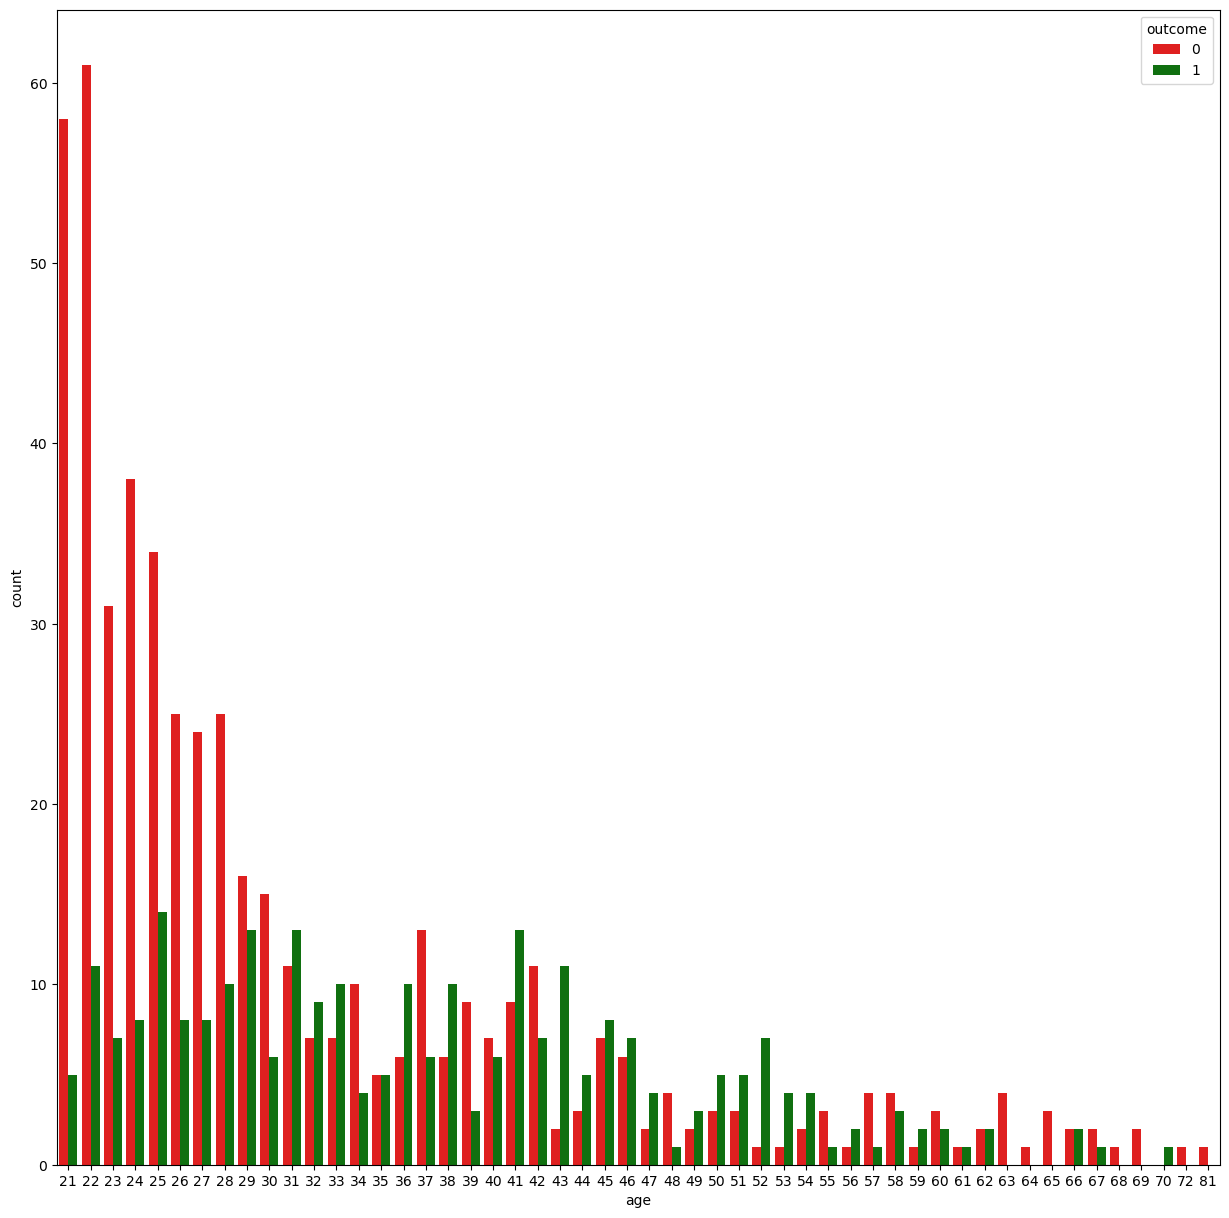

In [20]:
#Count of patients with/without diabetes based on age (0 - no diabetes, 1 - has diabetes)

plt.figure(figsize = (15,15))
sns.countplot(data=diabetes_df, x='age', hue='outcome', palette={'red','green'})

## Building Model

### Assigning independent and dependent variable

In [21]:
#x is our independent variables so therefore we drop const and outcome
x = diabetes_df.drop(['outcome'], axis = 1)

#score is our dependent variable
y = diabetes_df['outcome']

### Import relevant libraries

In [22]:
#Import relevant machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report



### Standardization

In [23]:
#Standardizing the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
x = scaler.fit_transform(x)

### Split into test and training set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [25]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=300, random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)



print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print('F1 score: ', f1_score(y_test, y_pred_lr))

y_pred_prob_lr = lr_model.predict_proba(x_test)[:, 1]
auc_lr = round(roc_auc_score(y_test, y_pred_prob_lr),5)
print('AUROC:' , auc_lr)

print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7272727272727273
F1 score:  0.6037735849056604
AUROC: 0.79371
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



<function matplotlib.pyplot.show(close=None, block=None)>

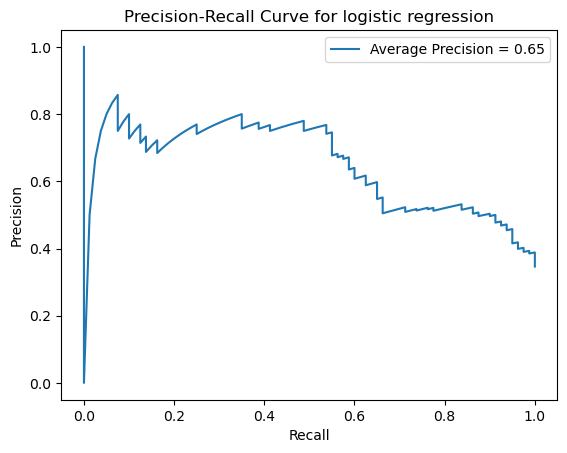

In [26]:
#precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_lr)
average_precision = average_precision_score(y_test, y_pred_prob_lr)

plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for logistic regression')
plt.legend(loc='upper right')
plt.show

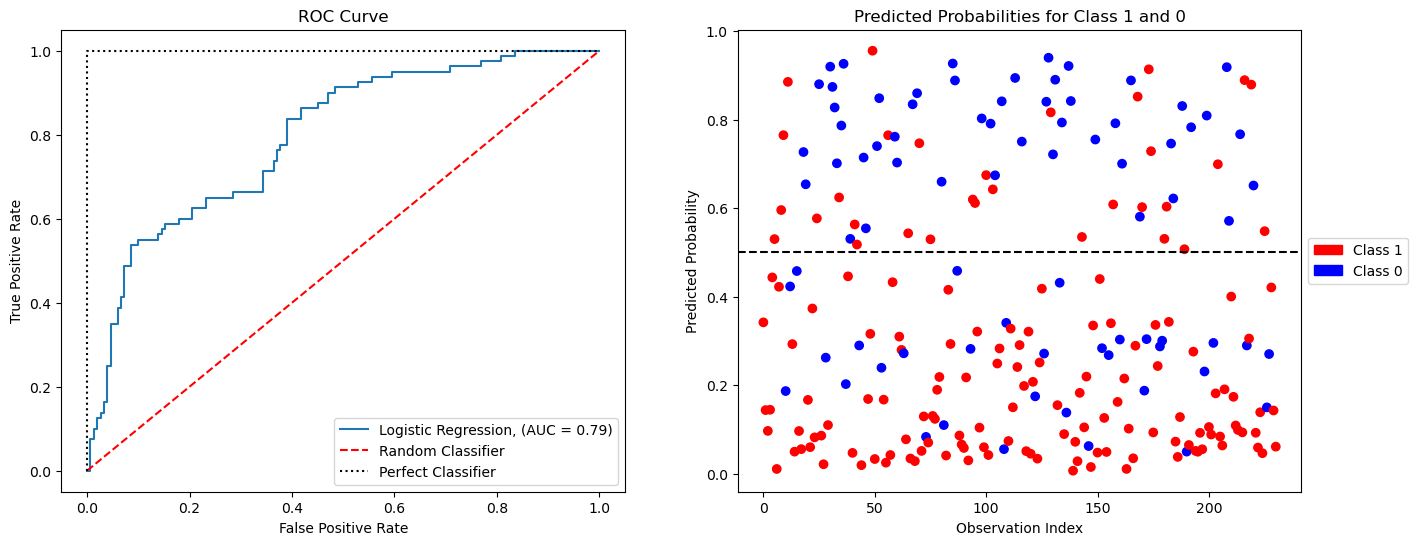

In [27]:
# auc roc curve for logistic regression

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2 , 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label="Logistic Regression, (AUC = %0.2f)" % auc_lr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red', label = 'Random Classifier') # red line for redline (random classifier)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect Classifier')

plt.title('ROC Curve')
plt.legend(loc = 'lower right')


# Predicted Probabilities for Class 1 and 0
ax2 = plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred_prob_lr)), y_pred_prob_lr, c=y_test, cmap='bwr_r')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Class 1 and 0')
red_patch = mpatches.Patch(color='red', label='Class 1')
blue_patch = mpatches.Patch(color='blue', label='Class 0')
plt.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1.0, 0.5))


Text(50.722222222222214, 0.5, 'Actual')

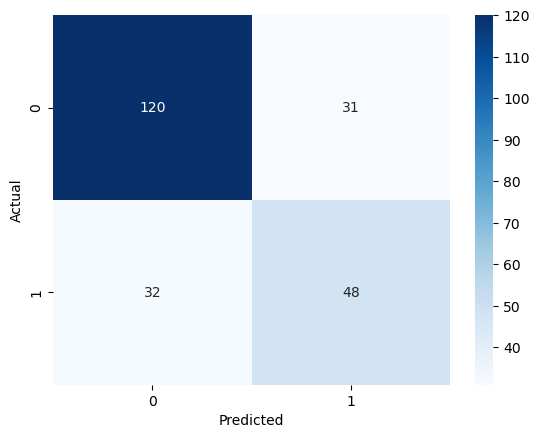

In [28]:
#Confusion matrix

cmatrix = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cmatrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel(xlabel="Predicted")
plt.ylabel(ylabel="Actual")

## Random Forest Classifier

In [29]:
#random forest

rf_model = RandomForestClassifier( random_state = 42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print('Accuracy test score: ' , rf_model.score(x_test,y_test))
print('F1 score: ', f1_score(y_test, y_pred_rf))


#AUC score
y_pred_prob_rf = rf_model.predict_proba(x_test)[:, 1]
auc_rf = round(roc_auc_score(y_test, y_pred_prob_rf),5)
print('AUCROC:' , auc_rf)

print(classification_report(y_test, y_pred_rf))

Accuracy test score:  0.7532467532467533
F1 score:  0.6503067484662576
AUCROC: 0.79921
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



<function matplotlib.pyplot.show(close=None, block=None)>

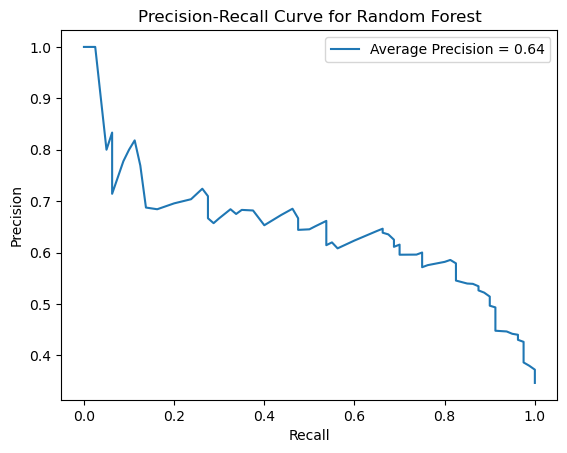

In [30]:
#precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rf)
average_precision = average_precision_score(y_test, y_pred_prob_rf)

plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='upper right')
plt.show

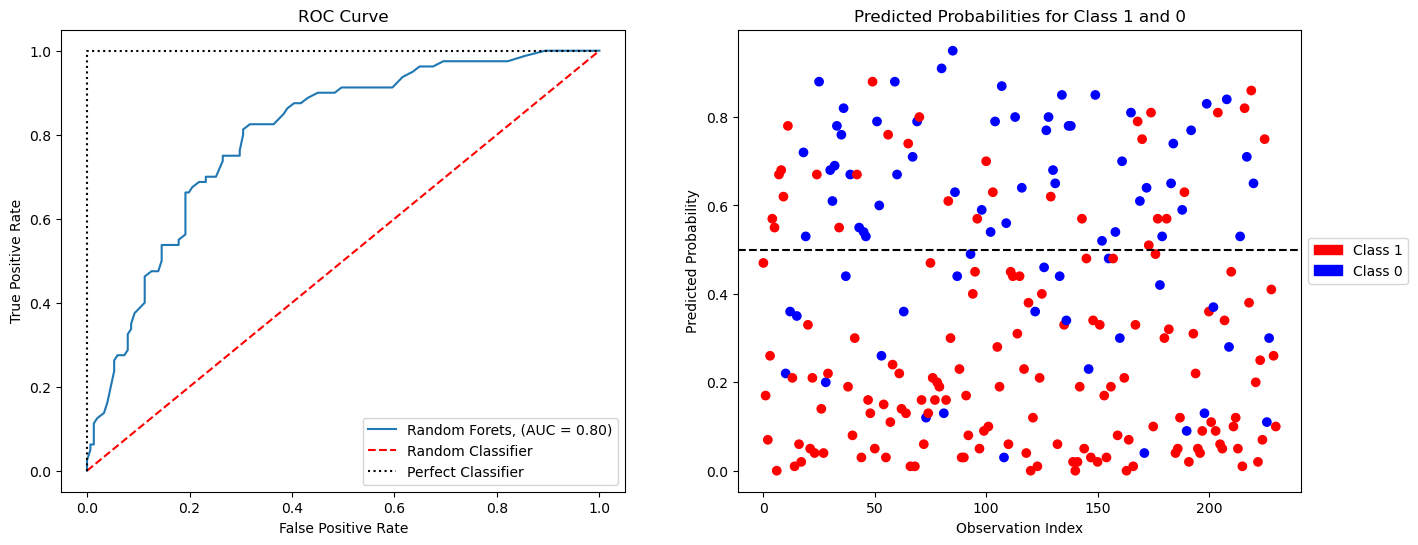

In [31]:
## auc roc for random forest


plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2 , 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label="Random Forets, (AUC = %0.2f)" % auc_rf )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red', label = 'Random Classifier') # red line for redline (random classifier)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect Classifier')

plt.title('ROC Curve')
plt.legend(loc = 'lower right')

# Predicted Probabilities for Class 1 and 0
ax2 = plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred_prob_rf)), y_pred_prob_rf, c=y_test, cmap='bwr_r')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Class 1 and 0')
red_patch = mpatches.Patch(color='red', label='Class 1')
blue_patch = mpatches.Patch(color='blue', label='Class 0')
plt.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1.0, 0.5))


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

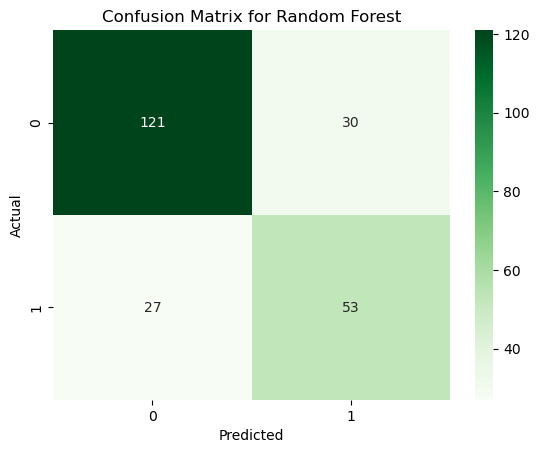

In [32]:
#Confusion matrix

cmatrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cmatrix, annot=True, cmap='Greens',fmt='.3g')
plt.xlabel(xlabel="Predicted")
plt.ylabel(ylabel="Actual")
plt.title('Confusion Matrix for Random Forest')

In [33]:
accu = (cmatrix[0][0] + cmatrix[1][1])/np.sum(cmatrix)
sens = cmatrix[1][1]/(cmatrix[1][0]+cmatrix[1][1])
fall = cmatrix[0][1]/(cmatrix[0][0]+cmatrix[0][1])
spec = cmatrix[0][0]/(cmatrix[0][0]+cmatrix[0][1])
misc = (cmatrix[0][1] + cmatrix[1][0])/np.sum(cmatrix)
prec = cmatrix[1][1]/(cmatrix[1][1]+cmatrix[0][1])
prev = (cmatrix[1][1] + cmatrix[1][0])/np.sum(cmatrix)

print("Accuracy: %.2f" % accu)
print("Sensitivity: %.2f" % sens)
print("Fall-out: %.2f" % fall)
print("Specificity: %.2f" % spec)
print("Misclassification Rate: %.2f" % misc)
print("Precision: %.2f" % prec)
print("Prevalence: %.2f" % prev)

Accuracy: 0.75
Sensitivity: 0.66
Fall-out: 0.20
Specificity: 0.80
Misclassification Rate: 0.25
Precision: 0.64
Prevalence: 0.35


## Decision Trees

In [34]:
dt_model = DecisionTreeClassifier(random_state = 42).fit(x_train, y_train)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)


print('Accuracy test score: ' , dt_model.score(x_test,y_test))
print('F1 score: ', f1_score(y_test, y_pred_dt))

#AUC score
y_pred_prob_dt = dt_model.predict_proba(x_test)[:, 1]
auc_dt = round(roc_auc_score(y_test, y_pred_prob_dt),5)
print('AUC:' , auc_dt)

print(classification_report(y_test, y_pred_dt))

Accuracy test score:  0.7056277056277056
F1 score:  0.5952380952380952
AUC: 0.68667
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       151
           1       0.57      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.71      0.71       231



<function matplotlib.pyplot.show(close=None, block=None)>

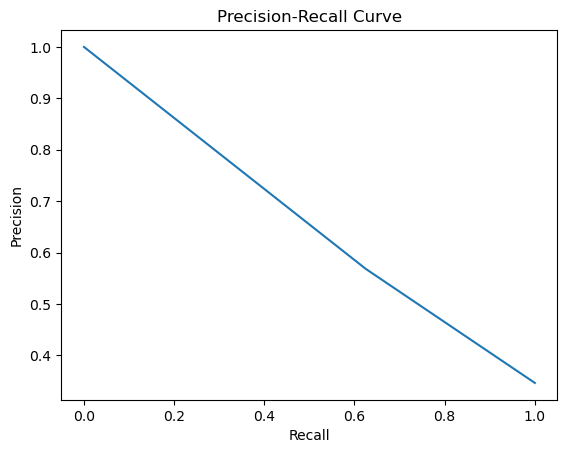

In [35]:
#precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_dt)
average_precision = average_precision_score(y_test, y_pred_prob_dt)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.show

In [36]:
from sklearn import tree

text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_1 <= 1.08
|   |--- feature_7 <= -0.40
|   |   |--- feature_1 <= 0.19
|   |   |   |--- feature_5 <= 2.42
|   |   |   |   |--- feature_5 <= -0.15
|   |   |   |   |   |--- feature_6 <= 1.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  1.12
|   |   |   |   |   |   |--- feature_4 <= -0.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  -0.82
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.15
|   |   |   |   |   |--- feature_6 <= 0.37
|   |   |   |   |   |   |--- feature_3 <= -0.61
|   |   |   |   |   |   |   |--- feature_2 <= -1.64
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  -1.64
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.06
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -0.74
|   |   |   |   |   |   |   |   |   | 

### Pruning (Run this code below twice)

In [39]:
#Pruning the decision tree
#run this twice
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(dt_model.tree_.children_left < 0))
# start pruning from the root
prune_index(dt_model.tree_, 0, 5)
sum(dt_model.tree_.children_left < 0)

118


118

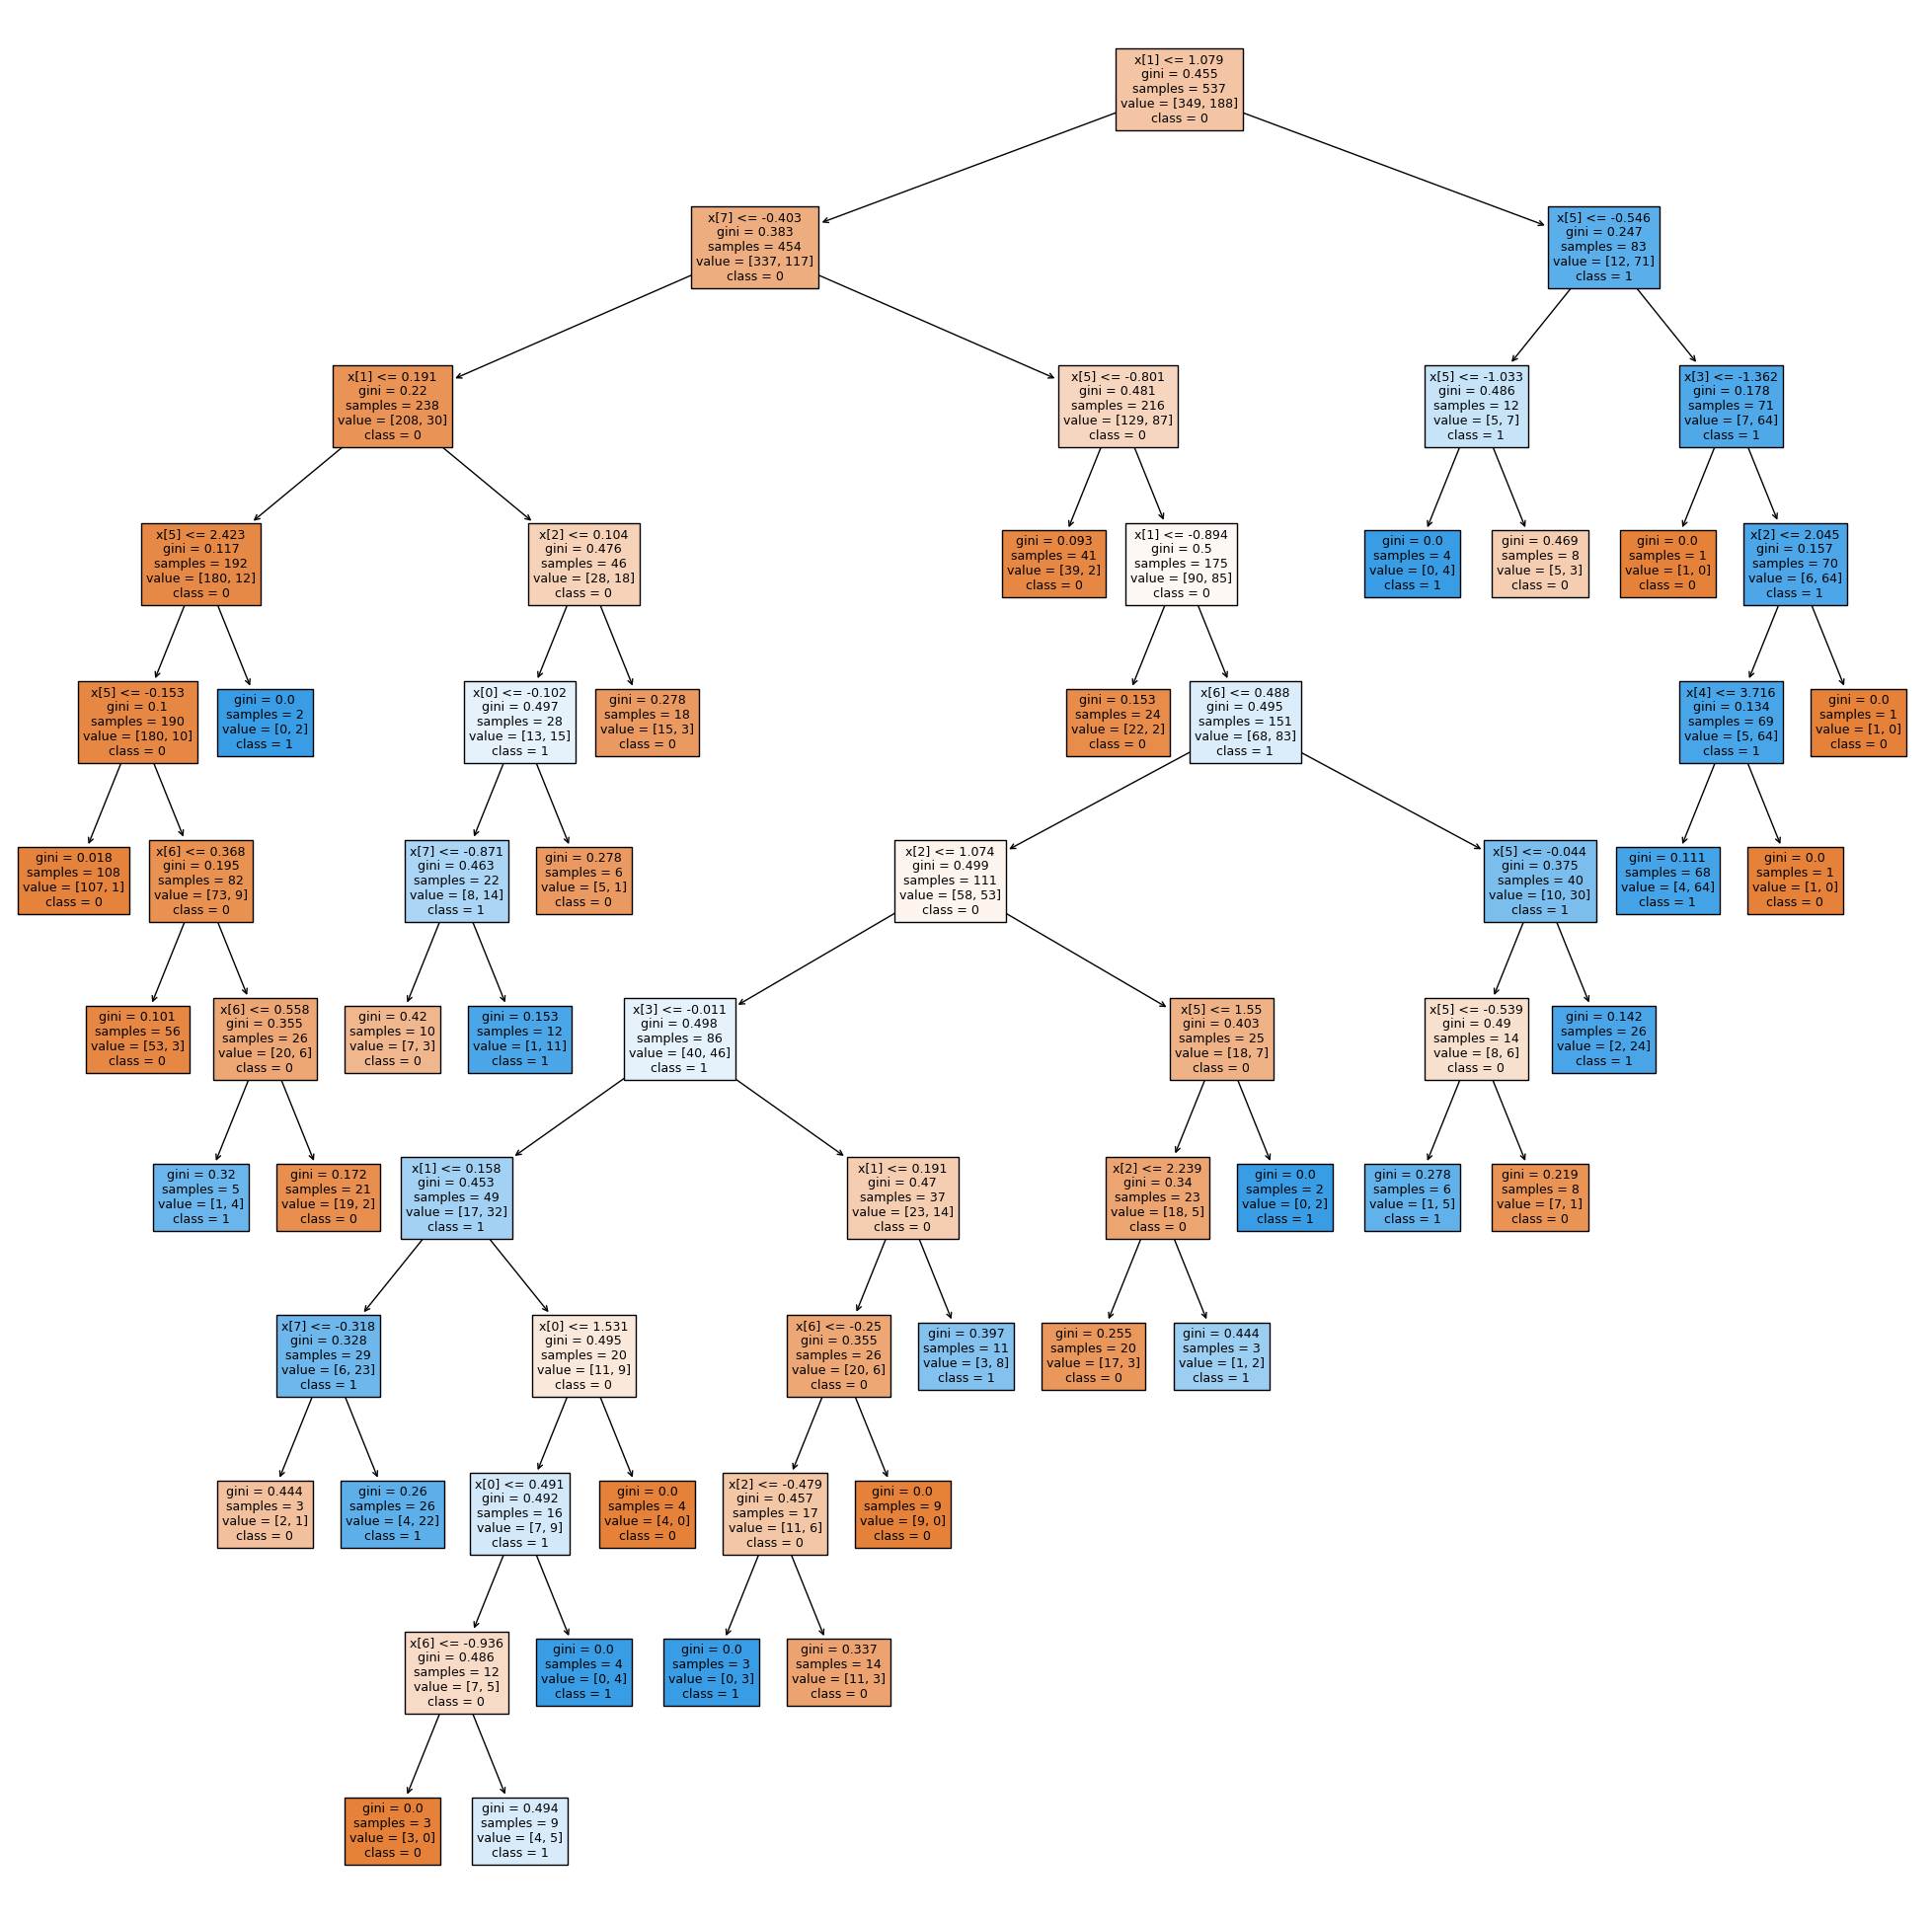

In [40]:
#visualizing the decision tree
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(dt_model, 
                
                   class_names = ['0','1'],
                   filled=True)

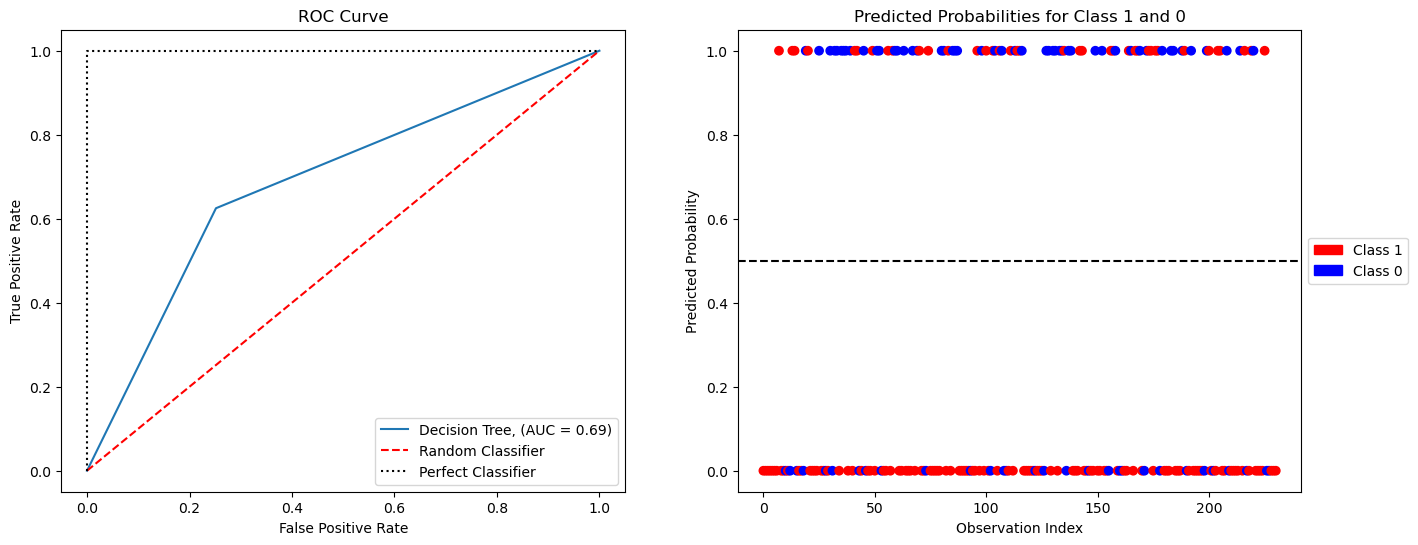

In [41]:
## auc roc for decision tree


plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2 , 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dt)
plt.plot(fpr, tpr, label="Decision Tree, (AUC = %0.2f)" % auc_dt )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red', label = 'Random Classifier') # red line for redline (random classifier)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect Classifier')

plt.title('ROC Curve')
plt.legend(loc = 'lower right')

# Predicted Probabilities for Class 1 and 0
ax2 = plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred_prob_dt)), y_pred_prob_dt, c=y_test, cmap='bwr_r')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Class 1 and 0')
red_patch = mpatches.Patch(color='red', label='Class 1')
blue_patch = mpatches.Patch(color='blue', label='Class 0')
plt.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1.0, 0.5))

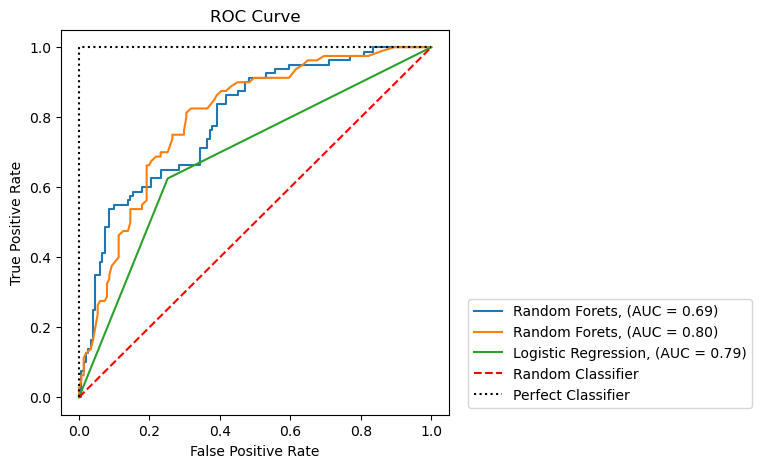

In [42]:
#Overall ROC curve comparison

plt.figure(figsize=(5,5))

fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob_lr)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob_rf)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob_dt)

plt.plot(fpr1, tpr1, label="Random Forets, (AUC = %0.2f)" % auc_dt )
plt.plot(fpr2, tpr2, label="Random Forets, (AUC = %0.2f)" % auc_rf )
plt.plot(fpr3, tpr3, label="Logistic Regression, (AUC = %0.2f)" % auc_lr )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red', label = 'Random Classifier') # red line for redline (random classifier)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect Classifier')

plt.title('ROC Curve')
plt.legend(loc = 'lower right', bbox_to_anchor=(1.8,0))

### 

### 

# World Happiness Report 2018 - Regression

Link to dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2018.csv

In [115]:
happiness_df = pd.read_csv('2018.csv')

happiness_df

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874                         0.681   
1             1.582                    0.861                         0.686   
2             1.590                    0.868                         0.683   
3             1.644                    0.914                         0.677   
4             1.549                    0.927                         0.660   
..              ...                      ...                           ...   
151           1.073                    0.343                         0.244   
152           0.991                    0.381                         0.481   
153           0.608                    0.177                         0.112   
154           0.000                    0.010                         0.305   
155           0.627                    0.145                         0.065   

     Generosity  Perceptions of corruption  
0         0.202                      0.393  
1         0.286                      0.340  
2         0.284                      0.408  
3         0.353                      0.138  
4         0.256                      0.357  
..          ...                        ...  
151       0.083                      0.064  
152       0.270                      0.097  
153       0.224                      0.106  
154       0.218                      0.038  
155       0.149                      0.076  

[156 rows x 9 columns]

### Renaming column names

In [44]:
happiness_df = happiness_df.rename({'Overall rank': 'rank',
                                    'Country or region':'country',
                                    'Score': 'score',
                                    'GDP per capita': 'gdp',
                                    'Social support': 'social',
                                    'Healthy life expectancy': 'life',
                                    'Freedom to make life choices':'freedom',
                                    'Generosity':'generosity',
                                    'Perceptions of corruption': 'corruption'
                                   }, axis = 1)
happiness_df

rank                   country  score    gdp  social   life  freedom  \
0       1                   Finland  7.632  1.305   1.592  0.874    0.681   
1       2                    Norway  7.594  1.456   1.582  0.861    0.686   
2       3                   Denmark  7.555  1.351   1.590  0.868    0.683   
3       4                   Iceland  7.495  1.343   1.644  0.914    0.677   
4       5               Switzerland  7.487  1.420   1.549  0.927    0.660   
..    ...                       ...    ...    ...     ...    ...      ...   
151   152                     Yemen  3.355  0.442   1.073  0.343    0.244   
152   153                  Tanzania  3.303  0.455   0.991  0.381    0.481   
153   154               South Sudan  3.254  0.337   0.608  0.177    0.112   
154   155  Central African Republic  3.083  0.024   0.000  0.010    0.305   
155   156                   Burundi  2.905  0.091   0.627  0.145    0.065   

     generosity  corruption  
0         0.202       0.393  
1         0.286       0.340  
2         0.284       0.408  
3         0.353       0.138  
4         0.256       0.357  
..          ...         ...  
151       0.083       0.064  
152       0.270       0.097  
153       0.224       0.106  
154       0.218       0.038  
155       0.149       0.076  

[156 rows x 9 columns]

### Check for missing values

- It seems there is a missing value in the corruption column, therefore, i will use the fillna() method. This will replace the missing values with the mean value for the column.

In [45]:
happiness_df.isnull().sum()

rank          0
country       0
score         0
gdp           0
social        0
life          0
freedom       0
generosity    0
corruption    1
dtype: int64

In [46]:
happiness_df[happiness_df['corruption'].isnull()]

rank               country  score    gdp  social  life  freedom  \
19    20  United Arab Emirates  6.774  2.096   0.776  0.67    0.284   

    generosity  corruption  
19       0.186         NaN

In [47]:
happiness_df['corruption'].fillna(happiness_df['corruption'].mean(), inplace = True)

In [48]:
happiness_df.isnull().sum()

rank          0
country       0
score         0
gdp           0
social        0
life          0
freedom       0
generosity    0
corruption    0
dtype: int64

In [49]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        156 non-null    int64  
 1   country     156 non-null    object 
 2   score       156 non-null    float64
 3   gdp         156 non-null    float64
 4   social      156 non-null    float64
 5   life        156 non-null    float64
 6   freedom     156 non-null    float64
 7   generosity  156 non-null    float64
 8   corruption  156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Data Visualization 

### Distribution of scores

<Axes: xlabel='score', ylabel='Count'>

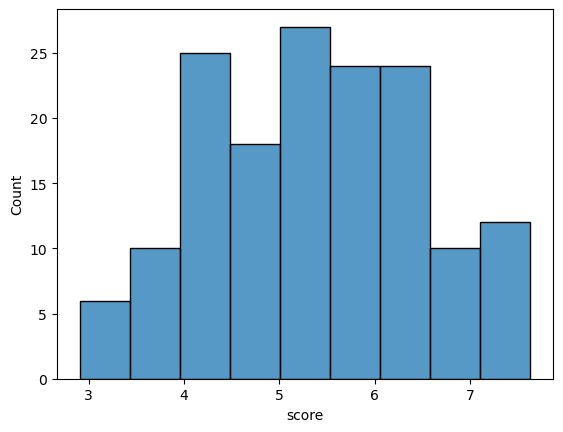

In [50]:
sns.histplot(x='score', data=happiness_df)


### Top 10 Happiest Countries 

Text(0.5, 1.0, 'Top 10 Happiest Countries')

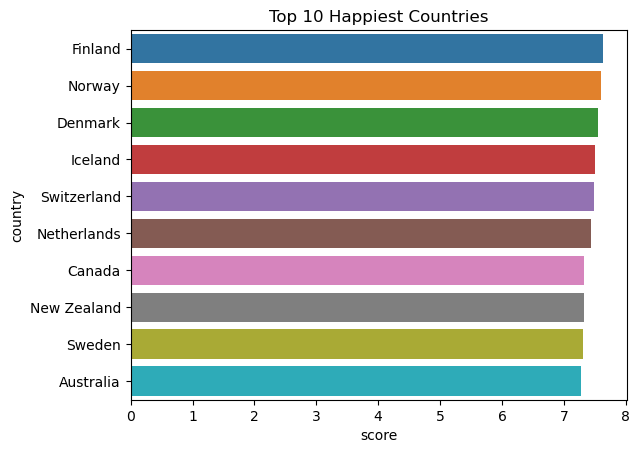

In [51]:
happiness_df_top10 = happiness_df.sort_values('score', ascending = False).head(10)
happiness_df_top10

happy1 = sns.barplot(x = 'score', y='country', data = happiness_df_top10)
happy1.set_title("Top 10 Happiest Countries")

### Top 10 Least Happiest Country

Text(0.5, 1.0, 'Top 10 Least Countries')

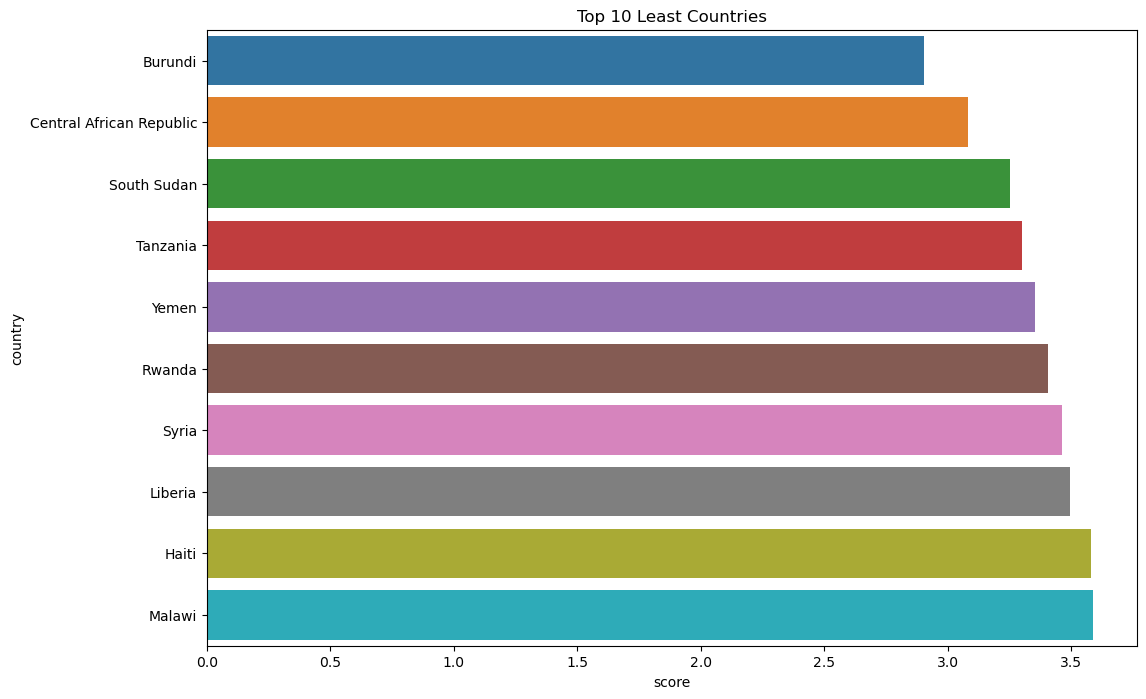

In [52]:
happiness_df_bottom10 = happiness_df.sort_values('score', ascending = True).head(10)
happiness_df_bottom10

plt.figure(figsize=(12,8))
happy1 = sns.barplot(x = 'score', y='country', data = happiness_df_bottom10)
happy1.set_title("Top 10 Least Countries")

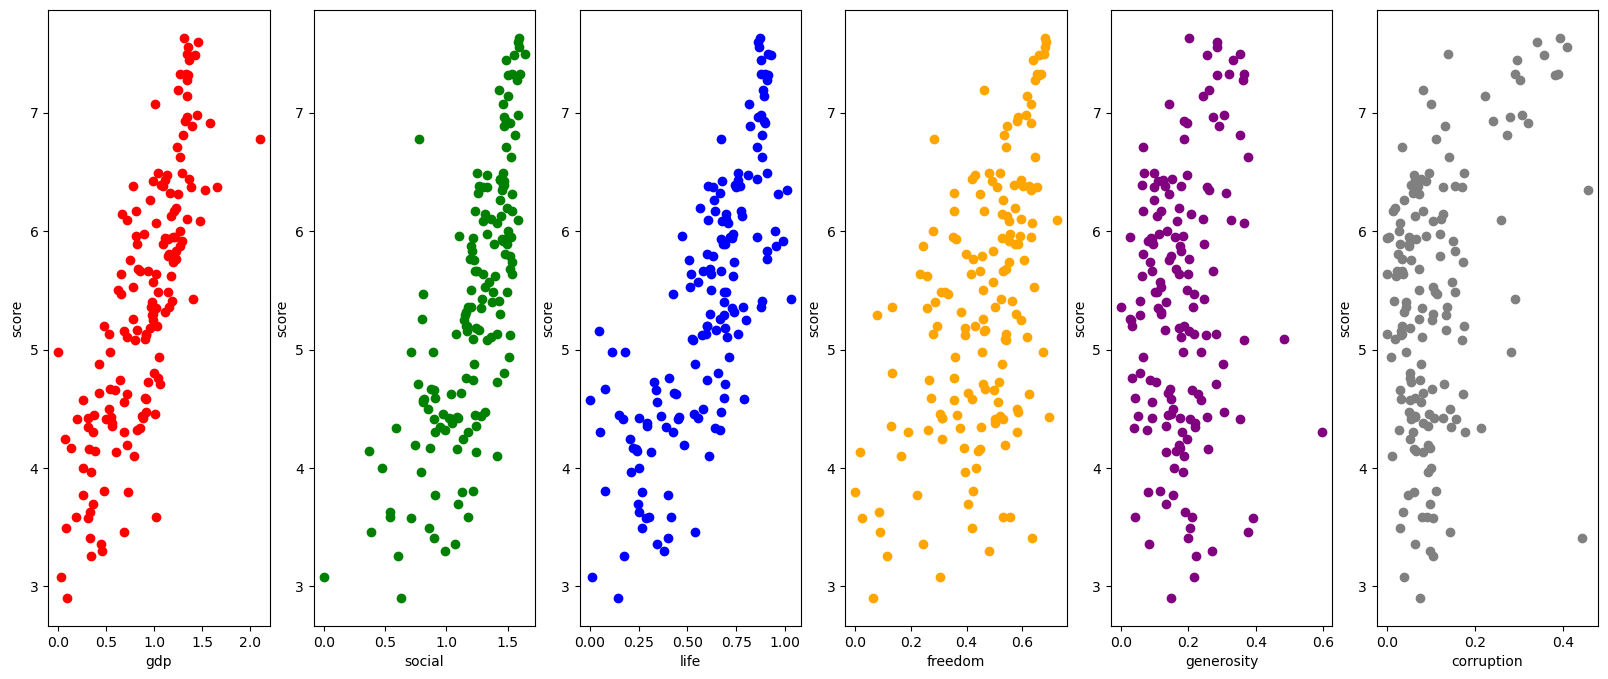

In [53]:
column_list = ["gdp","social","life","freedom","generosity","corruption"]
colors = ['red', 'green', 'blue', 'orange', 'purple','grey']

fig, axs = plt.subplots(nrows=1, ncols=len(column_list), figsize=(20,8))

  

for i, column_list in enumerate(column_list):
    
    axs[i].scatter(happiness_df[column_list], happiness_df['score'], color = colors[i])
    axs[i].set_xlabel(column_list)
    axs[i].set_ylabel('score')
    

### Heat map 

C:\Users\James\AppData\Local\Temp\ipykernel_22072\657747157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(happiness_df.corr(),annot=True)


<Axes: >

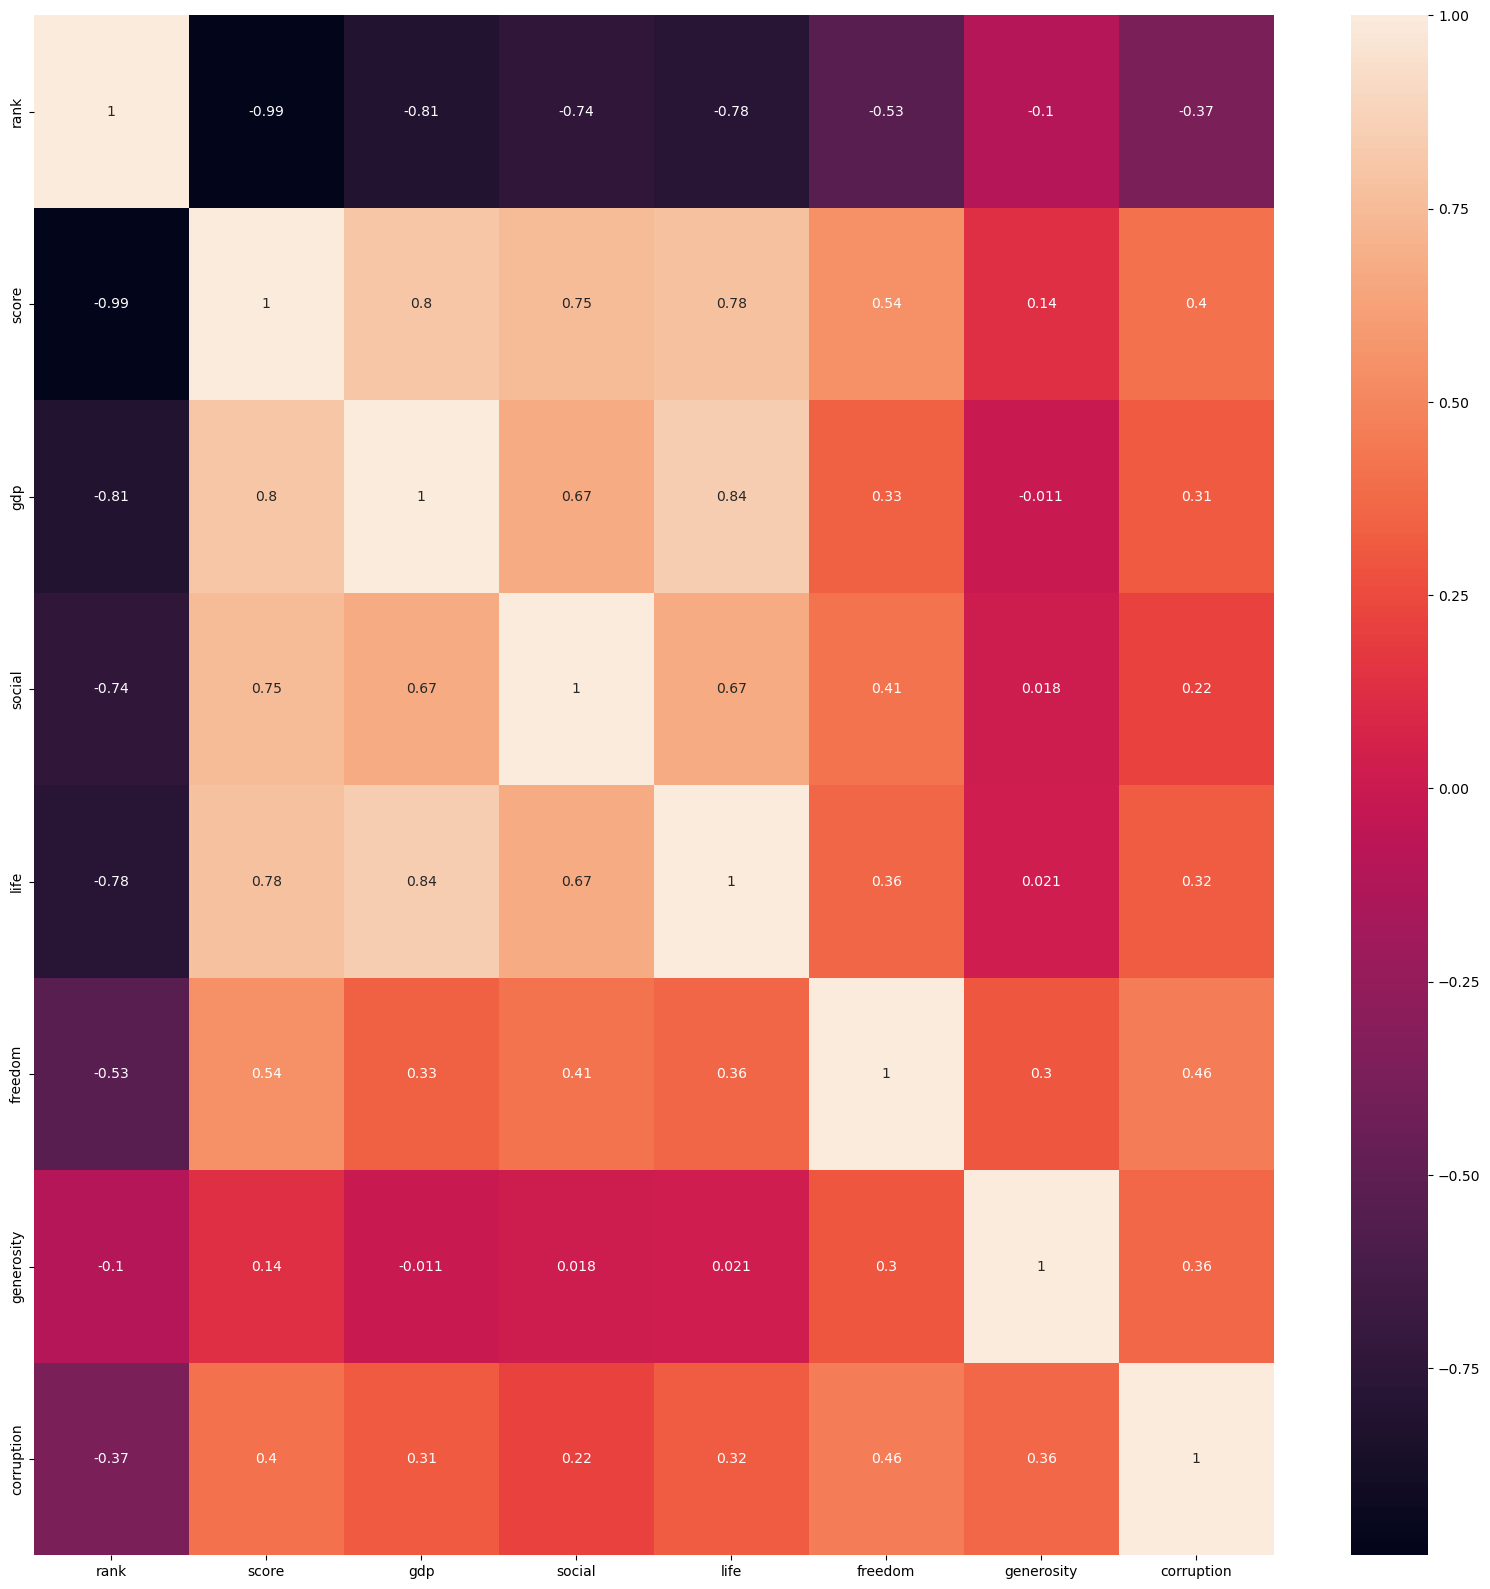

In [54]:
plt.figure(figsize = (20,20))
sns.heatmap(happiness_df.corr(),annot=True)

### Checking VIF for multi collinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

happiness_df = happiness_df.drop(['country'], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = happiness_df.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(happiness_df.values, i)
                          for i in range(len(happiness_df.columns))]
  
print(vif_data) 

      feature        VIF
0        rank   3.347654
1       score  75.222778
2         gdp  28.176055
3      social  42.409273
4        life  26.946469
5     freedom  15.164057
6  generosity   5.466929
7  corruption   3.472377


### Checking for Outliers in data

In [56]:
## how many percent is outliers?

for i in happiness_df.columns:
    happiness_df.sort_values(by=i,ascending=True,na_position='last')
    q1 = np.nanpercentile(happiness_df[i],25)
    q3 = np.nanpercentile(happiness_df[i],75)
    interquartile = q3 - q1
    upper_bound = q3+(interquartile*1.5)
    lower_bound = q1-(interquartile*1.5)
    outlier= happiness_df[i][(happiness_df[i] < lower_bound) | (happiness_df[i] > upper_bound)]
    percentage = (outlier.count()/happiness_df[i].count())*100
    print(f"{round(percentage,2)}% of the data in {i} are outliers, with a count of {outlier.count()}")

0.0% of the data in rank are outliers, with a count of 0
0.0% of the data in score are outliers, with a count of 0
0.64% of the data in gdp are outliers, with a count of 1
1.92% of the data in social are outliers, with a count of 3
0.0% of the data in life are outliers, with a count of 0
1.28% of the data in freedom are outliers, with a count of 2
1.28% of the data in generosity are outliers, with a count of 2
10.9% of the data in corruption are outliers, with a count of 17


<function matplotlib.pyplot.show(close=None, block=None)>

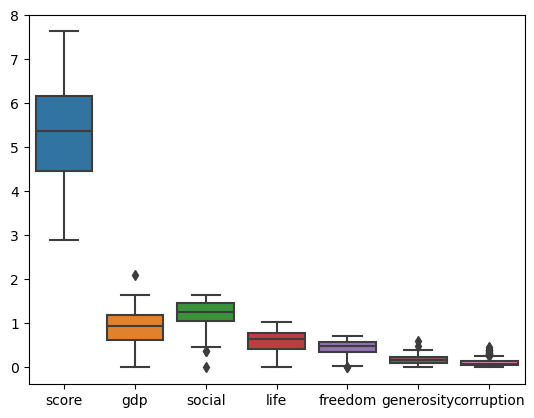

In [57]:
sns.boxplot(data = happiness_df[["score","gdp","social","life","freedom","generosity","corruption"]])
plt.show


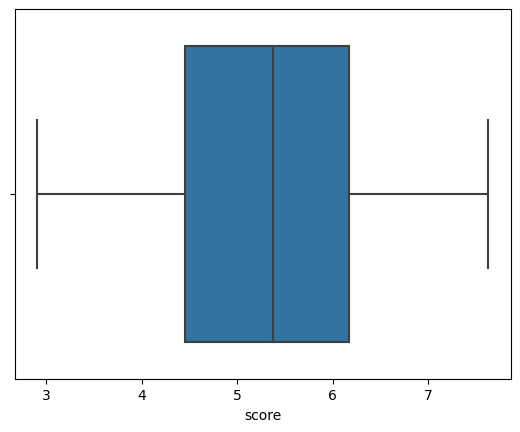

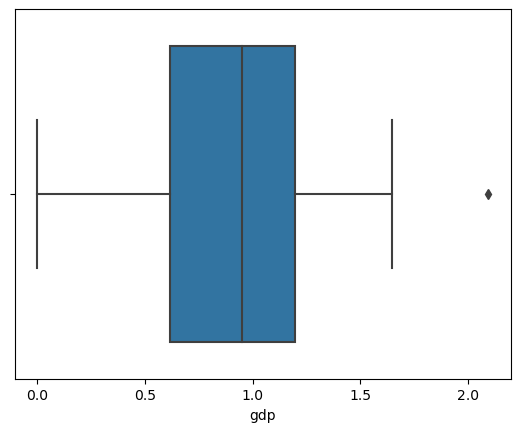

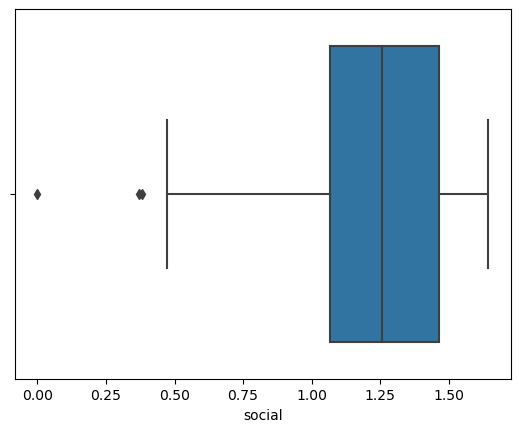

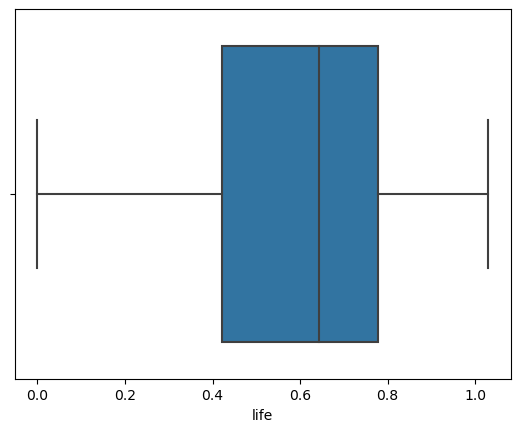

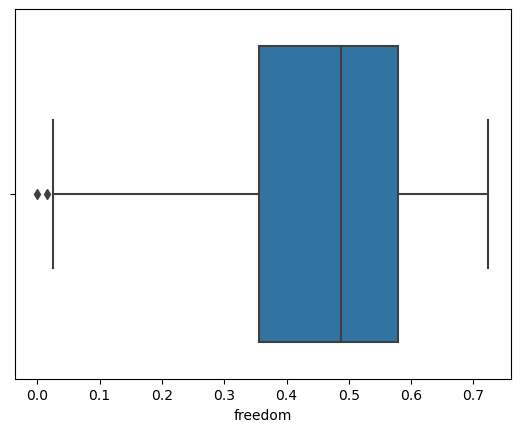

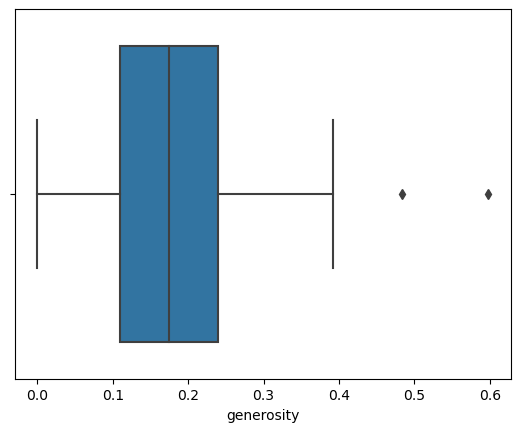

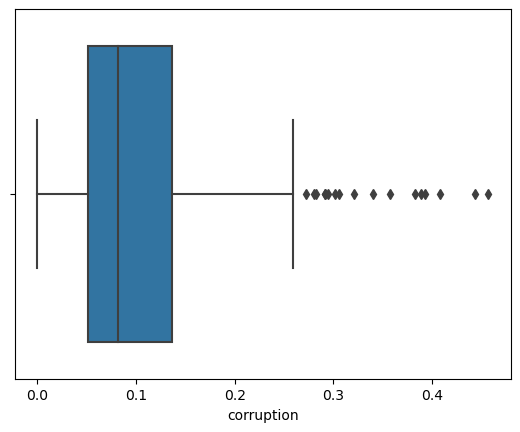

In [58]:
column_list = ["score","gdp","social","life","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = happiness_df[col])
    plt.xlabel(col)
    plt.show()

### Fixing outliers
- There are outliers in social , generosity and corruption 
- We are not able to delete the rows due to the structure of the dataset
- We will fix outliers using z scores test and replacing the outliers with the median of the column

In [59]:
#Replacing Corruption outliers with median values of Corruption

#MAD for bp
median = happiness_df['corruption'].median()
mad = happiness_df['corruption'].mad()
lower_b = median - 3 * mad 
upper_b = median + 3 * mad
outliers = happiness_df[(happiness_df['corruption'] < lower_b) | (happiness_df['corruption'] > upper_b)]
happiness_df.loc[outliers.index, 'corruption']  = median

C:\Users\James\AppData\Local\Temp\ipykernel_22072\2713332717.py:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = happiness_df['corruption'].mad()


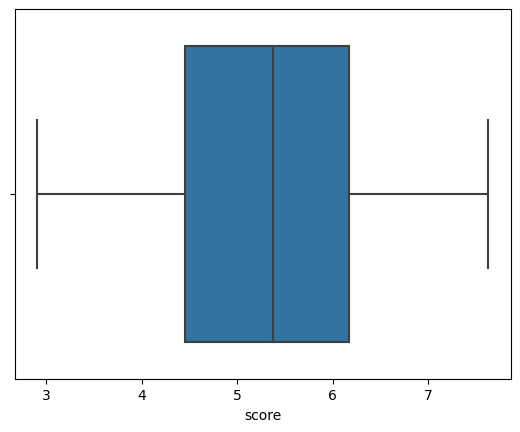

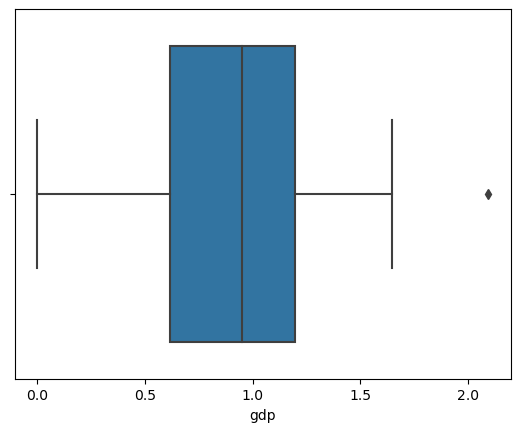

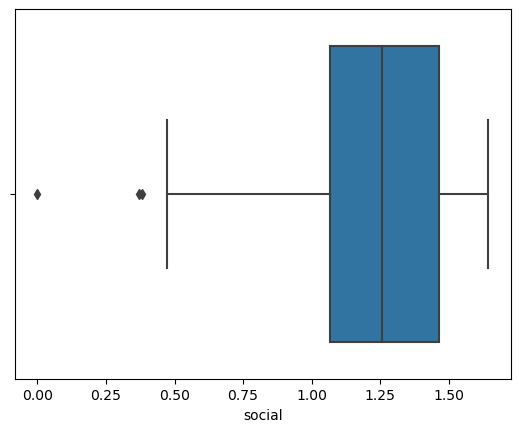

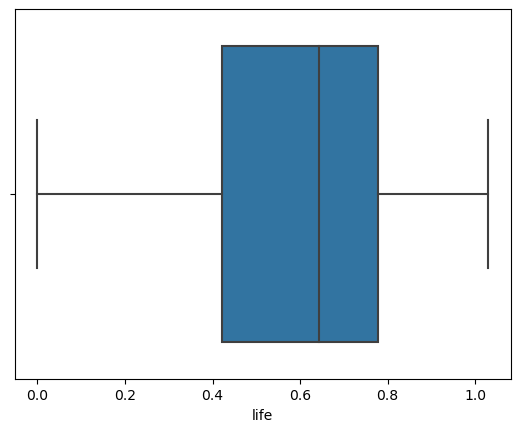

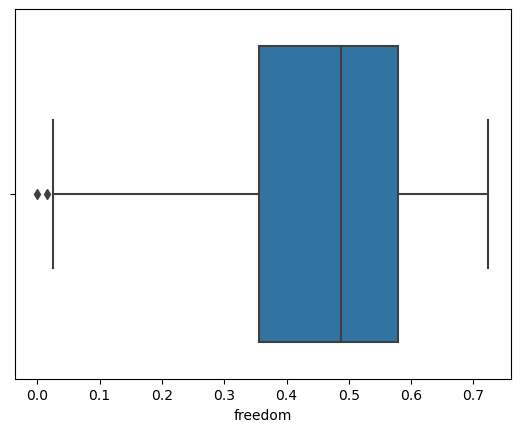

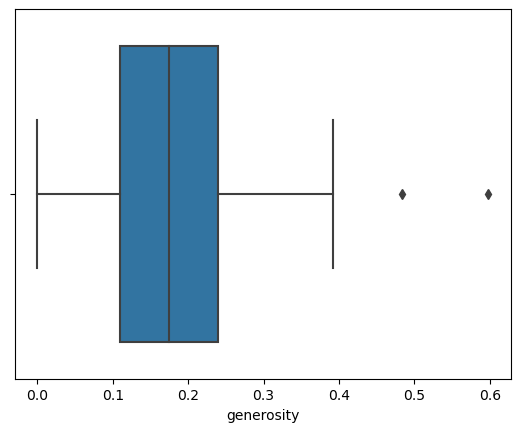

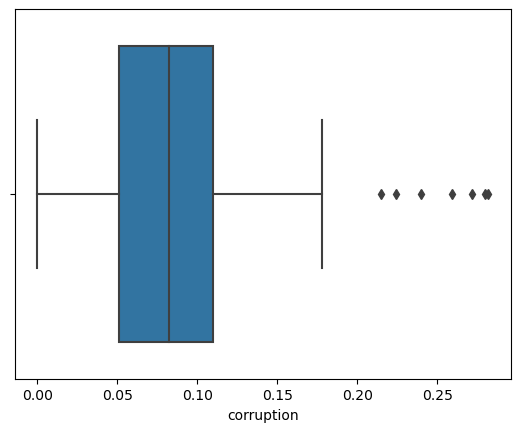

In [60]:
column_list = ["score","gdp","social","life","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = happiness_df[col])
    plt.xlabel(col)
    plt.show()

### Import relevant libraries for Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config

### Assigning independent and dependent variable

In [62]:
#x is our independent variables so therefore we drop score and country(which is a categorical variable)
x = happiness_df.drop(['score','rank'], axis = 1)

#score is our dependent variable
y = happiness_df['score']

### Split data set into training and testing set

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

### Lasso Regression

In [64]:
#Pipelining

steps = [('scaler', StandardScaler()),
         ('lasso', Lasso(alpha = 0.1))]

lasso_model = Pipeline(steps)
set_config(display = 'diagram')

lasso_model
lasso_model.fit(x_train, y_train)

y_train_pred_lasso = lasso_model.predict(x_train)
y_test_pred_lasso = lasso_model.predict(x_test)

print('Accuracy score of Lasso Regression: ' , lasso_model.score(x_test,y_test))
print('r2 score: ', r2_score(y, lasso_model.predict(x)))

MSE = mean_squared_error(y, lasso_model.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)



Accuracy score of Lasso Regression:  0.713936620578268
r2 score:  0.776190459006629
MSE: 0.27870093977695976
RMSE:  0.5279213386262765


Text(0.5, 1.0, 'Actual vs Predicted Values')

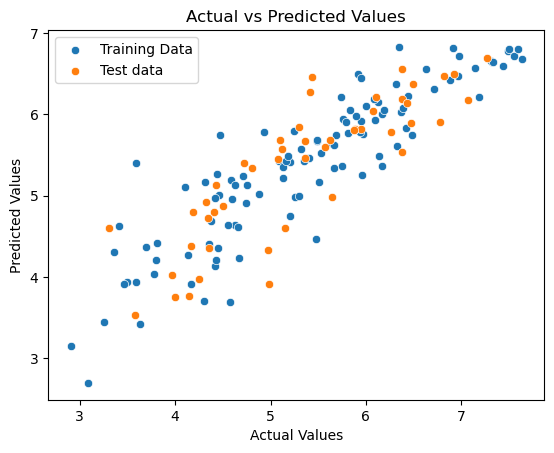

In [65]:
sns.scatterplot(x= y_train,y= y_train_pred_lasso, label='Training Data')
sns.scatterplot(x=y_test, y= y_test_pred_lasso, label='Test data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [66]:
#cv for lasso

params = {'alpha': np.arange(0.01,1,0.01)} #parameter declaration
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, params, cv=10) #crossvalidation
lasso_cv.fit(x_train,y_train)

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(lasso_cv.best_params_)) 
print("Best score: {}".format(lasso_cv.best_score_))

print('Accuracy score of Lasso Regression: ' , lasso_cv.score(x_test,y_test))
print('r2 score: ', r2_score(y, lasso_cv.predict(x)))

MSE = mean_squared_error(y, lasso_cv.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)


Tuned hyperparameter k: {'alpha': 0.01}
Best score: 0.7426024327415561
Accuracy score of Lasso Regression:  0.7123174473934066
r2 score:  0.781138146735953
MSE: 0.2725397850122199
RMSE:  0.5220534311851804


In [67]:
feature_names = x.columns

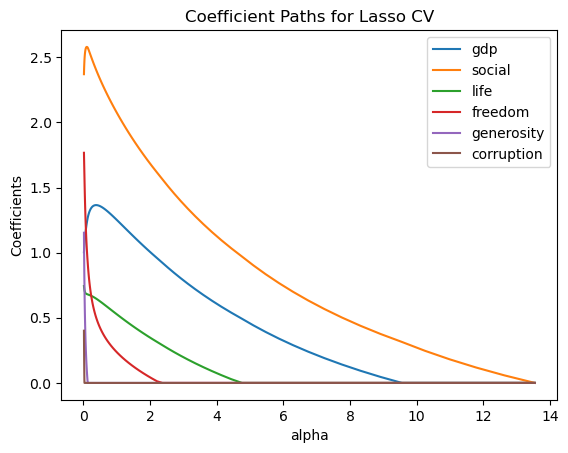

In [68]:
#coefficient paths
alphas, coefs, _ = lasso_model.path(x, y)
plt.figure()
for coef, feature_name in zip(coefs,feature_names):
    plt.plot(alphas, coef, label=feature_name)
plt.xlabel("alpha")
plt.ylabel("Coefficients")
plt.title("Coefficient Paths for Lasso CV")
plt.legend()
plt.show()

### Ridge Regression

In [69]:
#ridge regression

steps = [('scaler', StandardScaler()),
         ('ridge', Ridge(alpha = 1))]

ridge_model = Pipeline(steps)
set_config(display = 'diagram')

ridge_model
ridge_model.fit(x_train, y_train)

y_train_pred_ridge = ridge_model.predict(x_train)
y_test_pred_ridge = ridge_model.predict(x_test)

print('Accuracy score of Ridge Regression: ' , ridge_model.score(x_test,y_test))
print('r2 score: ', r2_score(y, ridge_model.predict(x)))

MSE = mean_squared_error(y, ridge_model.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Accuracy score of Ridge Regression:  0.702342678070428
r2 score:  0.7852902489575044
MSE: 0.26736934059747247
RMSE:  0.5170776929992943


Text(0.5, 1.0, 'Actual vs Predicted Values')

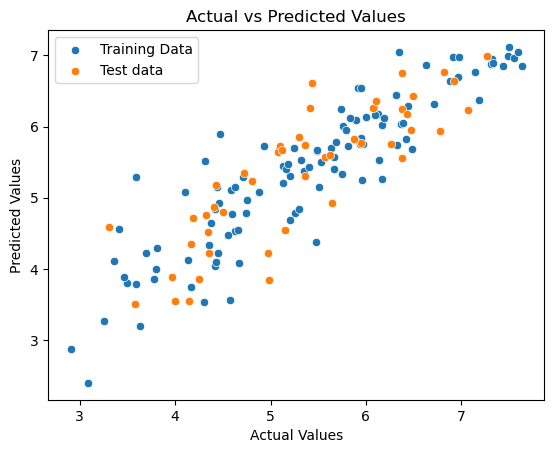

In [70]:
sns.scatterplot(x= y_train,y= y_train_pred_ridge, label='Training Data')
sns.scatterplot(x=y_test, y= y_test_pred_ridge, label='Test data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [71]:
#cv for ridge
params = {'alpha': np.logspace(-4, 4, 100)} #parameter declaration
ridge_model = Ridge()
ridge_cv = GridSearchCV(ridge_model, params, cv=10) #crossvalidation
ridge_cv.fit(x_train,y_train)

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(ridge_cv.best_params_)) 
print("Best score: {}".format(ridge_cv.best_score_))

print('Accuracy score of Ridge Regression: ' , ridge_cv.score(x_test,y_test))
print('r2 score: ', r2_score(y, ridge_cv.predict(x)))

MSE = mean_squared_error(y, ridge_cv.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Tuned hyperparameter k: {'alpha': 1.3219411484660315}
Best score: 0.7522473251152546
Accuracy score of Ridge Regression:  0.7123873337187273
r2 score:  0.7829439478768515
MSE: 0.27029109412627766
RMSE:  0.5198952722676728


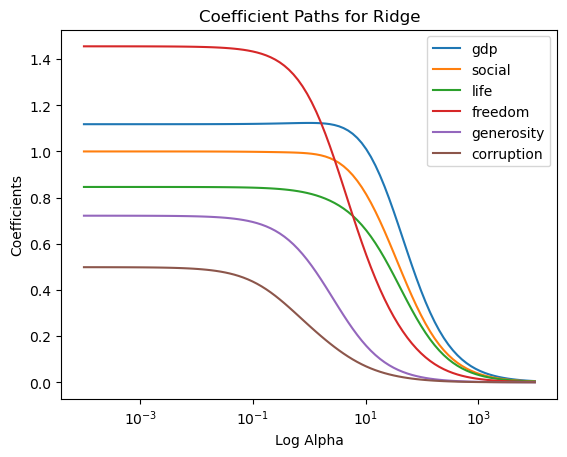

In [72]:
alphas = np.logspace(-4, 4, 100)
ridge_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

plt.figure()
for coef, feature_name in zip(np.array(ridge_coefs).T, feature_names):
    plt.plot(alphas, coef, label=feature_name)
plt.xscale("log")
plt.xlabel("Log Alpha")
plt.ylabel("Coefficients")
plt.title("Coefficient Paths for Ridge")
plt.legend()
plt.show()

### Multiple Linear Regression

In [73]:
#Pipelining

steps = [('scaler', StandardScaler()),
         ('regressor', LinearRegression())]

mlr_model = Pipeline(steps)
set_config(display = 'diagram')

mlr_model
mlr_model.fit(x_train, y_train)

print('Accuracy score of Multiple Linear Regression: ' , mlr_model.score(x_test,y_test))
print('r2 score: ', r2_score(y, mlr_model.predict(x)))

MSE = mean_squared_error(y, mlr_model.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Accuracy score of Multiple Linear Regression:  0.702028444160889
r2 score:  0.7852228534060587
MSE: 0.2674532655429477
RMSE:  0.5171588397610039


In [74]:
mlr_model = LinearRegression()
mlr_model.fit(x_train,y_train)


coefficients = mlr_model.coef_
print(pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']))


            Coefficient
gdp            0.986259
social         1.057343
life           1.119536
freedom        1.468661
generosity     0.892868
corruption     0.145474


### Random Forest Regressor

In [75]:
steps = [('scaler', StandardScaler()),
         ('regressor', RandomForestRegressor(random_state = 42 ))]

rfr_model = Pipeline(steps)
set_config(display = 'diagram')

rfr_model
rfr_model.fit(x_train, y_train)

y_train_pred_rf = rfr_model.predict(x_train)
y_test_pred_rf = rfr_model.predict(x_test)

print('Accuracy score of Random Forest Regressor: ' , rfr_model.score(x_test,y_test))
print('r2 score: ', r2_score(y, rfr_model.predict(x)))

MSE = mean_squared_error(y, rfr_model.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Accuracy score of Random Forest Regressor:  0.7037892404130309
r2 score:  0.9082535461911241
MSE: 0.11424813609038455
RMSE:  0.3380061184215229


Text(0.5, 1.0, 'Actual vs Predicted Values')

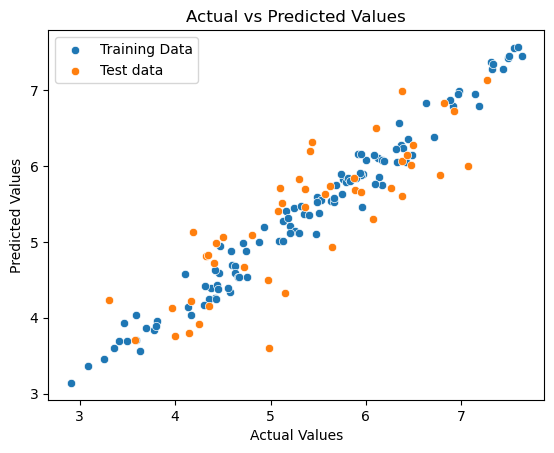

In [76]:
sns.scatterplot(x= y_train,y= y_train_pred_rf, label='Training Data')
sns.scatterplot(x=y_test, y= y_test_pred_rf, label='Test data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

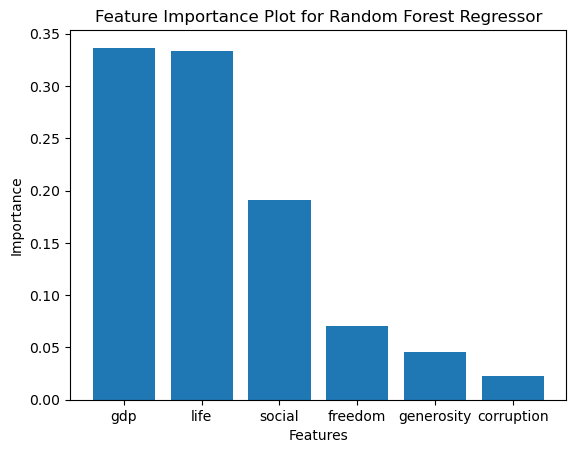

In [77]:
# Feature importance plot

rfmodel = RandomForestRegressor(random_state=42) #i have to redo another model since pipeline does not have these features.
rfmodel.fit(x, y)

important_feature = rfmodel.feature_importances_
importance_df = pd.DataFrame(important_feature, index=feature_names, columns=['Importance'])
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.bar(sorted_importance_df.index, sorted_importance_df['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Plot for Random Forest Regressor")
plt.show()

In [78]:
#CV for RFR
params = {'n_estimators': np.arange(10,100)} #parameter declaration
rfr_model = RandomForestRegressor()
rfr_cv = GridSearchCV(rfr_model, params, cv=10) #crossvalidation
rfr_cv.fit(x_train,y_train)

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(rfr_cv.best_params_)) 
print("Best score: {}".format(rfr_cv.best_score_))

print('Accuracy score of Random Forest Regressor: ' , rfr_cv.score(x_test,y_test))
print('r2 score: ', r2_score(y, rfr_cv.predict(x)))

MSE = mean_squared_error(y, rfr_cv.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Tuned hyperparameter k: {'n_estimators': 38}
Best score: 0.7597894843170028
Accuracy score of Random Forest Regressor:  0.6798845542425314
r2 score:  0.9030654807050119
MSE: 0.12070862352173442
RMSE:  0.3474314659349876


### K Neighbours Regressor

In [79]:
steps = [('scaler', StandardScaler()),
         ('regressor', KNeighborsRegressor(n_neighbors=10))]

knr_model = Pipeline(steps)
set_config(display = 'diagram')

knr_model
knr_model.fit(x_train, y_train)

y_train_pred_knr = knr_model.predict(x_train)
y_test_pred_knr = knr_model.predict(x_test)

print('Accuracy score of K neighbour Regressor: ' , knr_model.score(x_test,y_test))
print('r2 score: ', r2_score(y, knr_model.predict(x)))


MSE = mean_squared_error(y, knr_model.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Accuracy score of K neighbour Regressor:  0.6581047113686738
r2 score:  0.7778649404147366
MSE: 0.27661577602564114
RMSE:  0.5259427497605049


Text(0.5, 1.0, 'Actual vs Predicted Values')

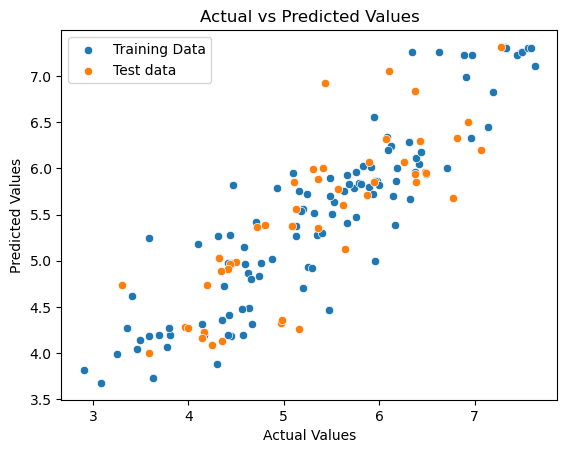

In [80]:
sns.scatterplot(x= y_train,y= y_train_pred_knr, label='Training Data')
sns.scatterplot(x=y_test, y= y_test_pred_knr, label='Test data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [81]:
#CV for KNR
params = {'n_neighbors': np.arange(1,50)} #parameter declaration
knr_model = KNeighborsRegressor()
knr_cv = GridSearchCV(knr_model, params, cv=10) #crossvalidation
knr_cv.fit(x_train,y_train)

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knr_cv.best_params_)) 
print("Best score: {}".format(knr_cv.best_score_))

print('Accuracy score of K neighbour Regressor: ' , knr_cv.score(x_test,y_test))
print('r2 score: ', r2_score(y, knr_cv.predict(x)))

MSE = mean_squared_error(y, knr_cv.predict(x))
RMSE = np.sqrt(MSE)
print('MSE:' , MSE)
print('RMSE: ', RMSE)

Tuned hyperparameter k: {'n_neighbors': 8}
Best score: 0.763954410462607
Accuracy score of K neighbour Regressor:  0.7689184143186802
r2 score:  0.8298592093817213
MSE: 0.21186942267628212
RMSE:  0.4602927575753089


<br/>

<br/>

# Mall Customer Segmentation Data - Unsupervised Learning


Link to dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [82]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

In [116]:
mall_df= pd.read_csv('Mall_Customers.csv')
mall_df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [117]:
mall_df = mall_df.rename({'Annual Income (k$)': 'Income',
                        'Spending Score (1-100)':'Spending',
                         'CustomerID' : 'Id'}, axis = 1)

In [118]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        200 non-null    int64 
 1   Gender    200 non-null    object
 2   Age       200 non-null    int64 
 3   Income    200 non-null    int64 
 4   Spending  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [86]:
mall_df.isnull().sum()

Id          0
Gender      0
Age         0
Income      0
Spending    0
dtype: int64

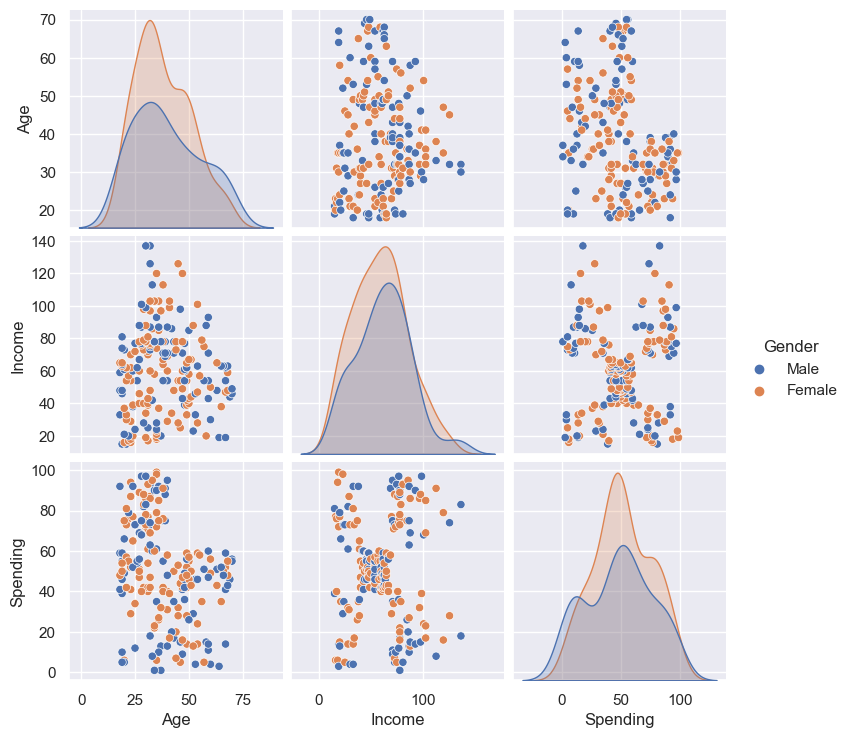

In [87]:
sns.set()
sns.pairplot(mall_df.drop('Id', axis = 1), hue = 'Gender')
plt.show()

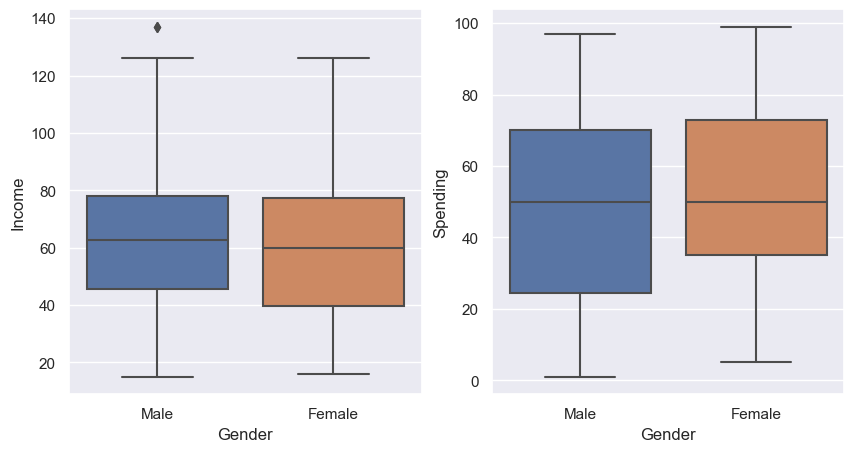

In [88]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x='Gender', y='Income', data=mall_df, ax = ax1)
sns.boxplot(x='Gender', y='Spending', data=mall_df, ax = ax2)
plt.show()


## Plotting Annual Income and Spending Score by Gender


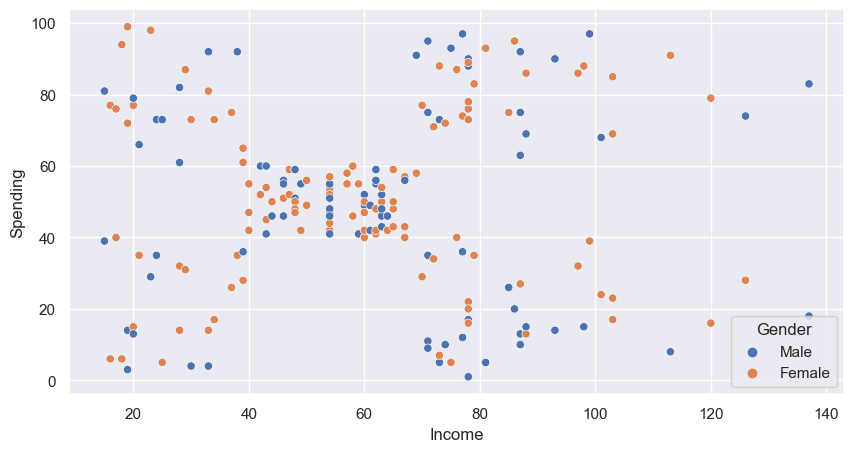

In [89]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Income', y='Spending', hue='Gender', data=mall_df)
plt.show()

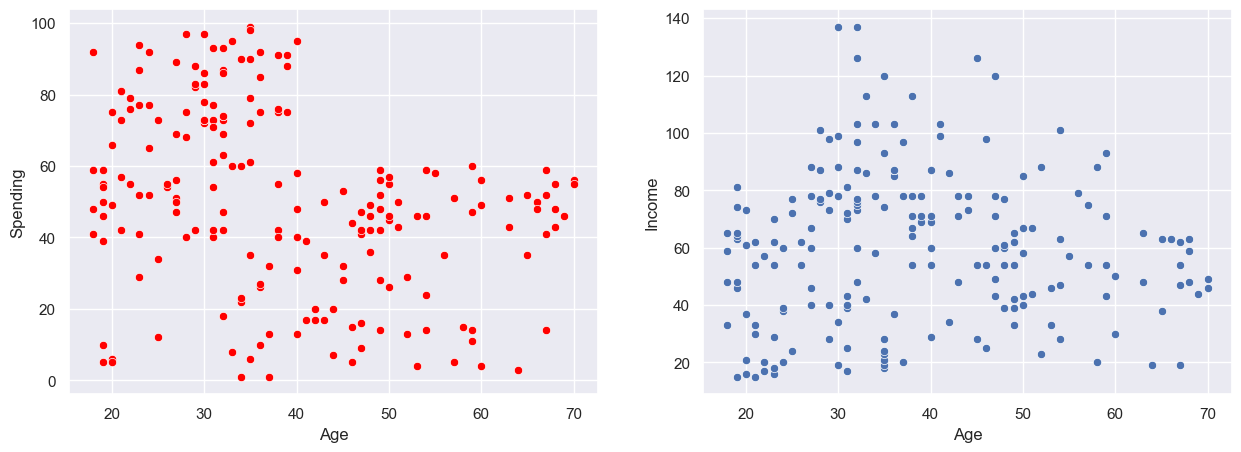

In [90]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
sns.scatterplot(x='Age', y='Spending', data=mall_df,color='red', ax=ax1)
sns.scatterplot(x='Age', y='Income', data=mall_df, ax=ax2)
plt.show()


## Clustering based on Income and Spending

In [91]:
x1 = mall_df[['Income' , 'Spending']].iloc[: , :].values

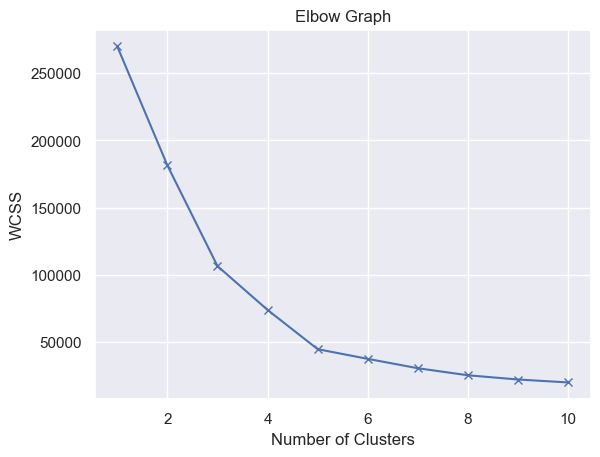

In [92]:
import warnings
warnings.filterwarnings('ignore')

# WCSS -> Within Clusters Sum of Squares
# finding wcss value for different number of clusters

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',n_init = 10 ,max_iter= 100, random_state = 42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
#plot elbow graph
plt.plot(range(1,11), wcss , 'bx-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

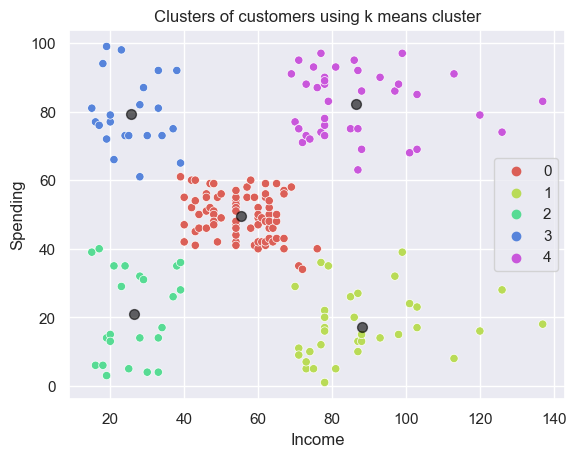

In [93]:
km1 = KMeans(n_clusters = 5, init = 'k-means++' , n_init = 10 ,max_iter=300, random_state = 42)

km1.fit(x1)
labels = km1.labels_
centroid = km1.cluster_centers_


sns.scatterplot(x = 'Income', y = 'Spending', data = mall_df, hue= labels,  palette=sns.color_palette('hls', 5) )
plt.scatter(x = centroid[: , 0] , y =  centroid[: , 1] , s = 50 , c = 'black' , alpha = 0.6)


plt.title('Clusters of customers using k means cluster')
plt.show()

In [94]:
## Scale the data before hierachical cluster and db scan
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

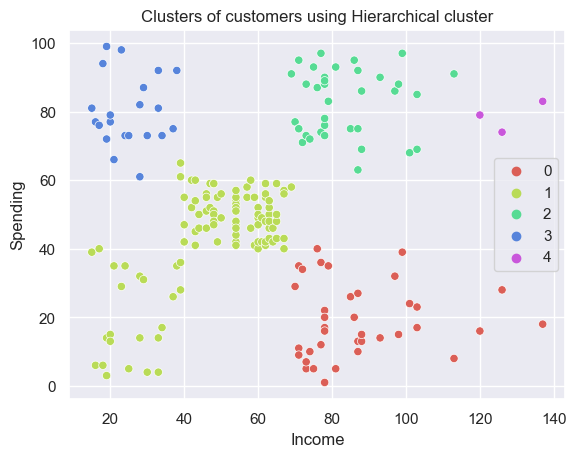

In [95]:
hcluster1 = AgglomerativeClustering(n_clusters = 5, linkage = 'average')

hcluster1.fit(x1)
labels = hcluster1.labels_


sns.scatterplot(x = 'Income', y = 'Spending', data= mall_df, hue = labels, palette=sns.color_palette('hls', 5))

plt.title('Clusters of customers using Hierarchical cluster')
plt.show()

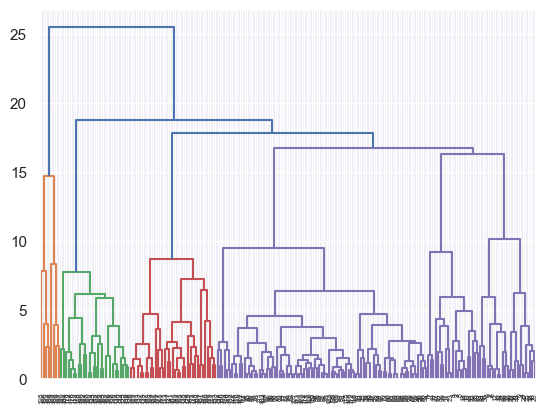

In [96]:
dist = distance_matrix(x1, x1)
z1 = hierarchy.linkage(dist, method = 'average')
dendro = hierarchy.dendrogram(z1)
plt.show()

### DB SCAN for Income and Spending

Text(0, 0.5, 'Distance')

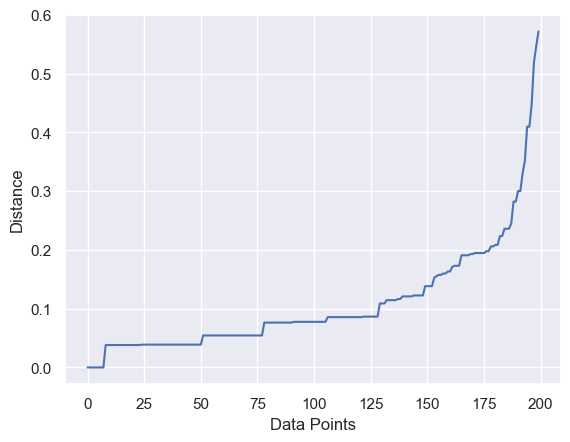

In [97]:
#Finding the optimal value for EPS
knn_model = NearestNeighbors(n_neighbors=2)
nbrs = knn_model.fit(x1)


distances, indices = nbrs.kneighbors(x1)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')


Text(0, 0.5, 'Spending')

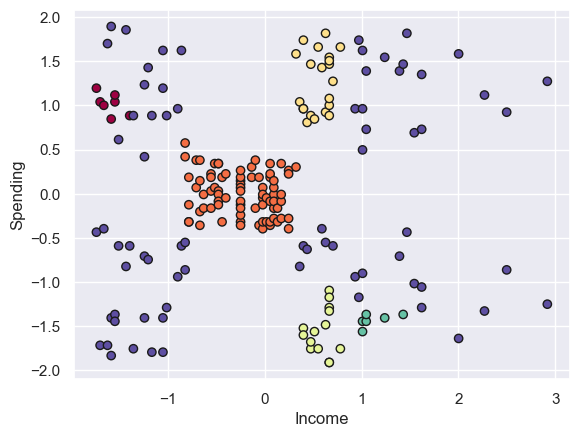

In [98]:
dbscan = DBSCAN(eps=0.2, min_samples=2 * x1.shape[1])
dbscan.fit(x1)
dbscan_predict = dbscan.fit_predict(x1)

# Visualize the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(dbscan_predict))))

# Visualize the clusters
plt.scatter(x1[:, 0], x1[:, 1], c=colors[dbscan_predict], edgecolors='k')
plt.xlabel('Income')
plt.ylabel('Spending')


## Clustering using Age and Spending Score
<br/>

In [99]:
x2 = mall_df[['Age' , 'Spending']].iloc[: , :].values


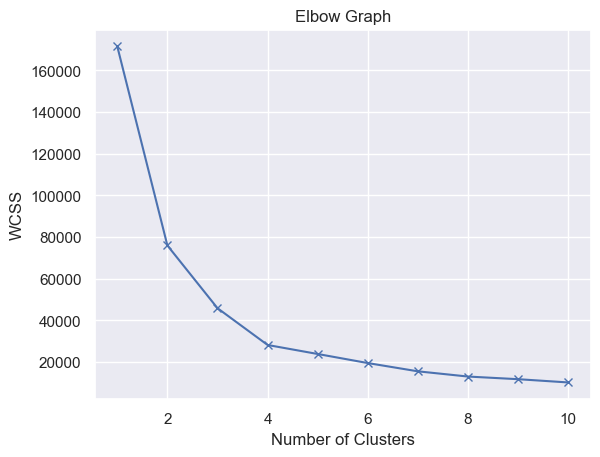

In [100]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10 ,max_iter= 100, random_state = 42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
#plot elbow graph
plt.plot(range(1,11), wcss , 'bx-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

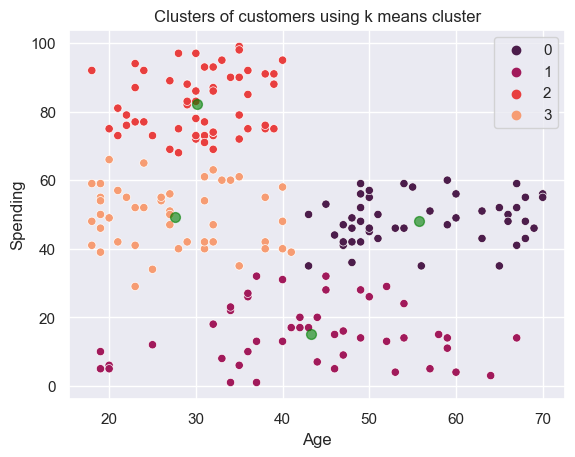

In [101]:
km2 = KMeans(n_clusters = 4, init = 'k-means++' , n_init = 10 ,max_iter=300, random_state = 42)

km2.fit(x2)
labels = km2.labels_
centroid = km2.cluster_centers_


sns.scatterplot(x = 'Age', y = 'Spending', data = mall_df, hue= labels,  palette=sns.color_palette('rocket', 4) )
plt.scatter(x = centroid[: , 0] , y =  centroid[: , 1] , s = 50 , c = 'green' , alpha = 0.6)


plt.title('Clusters of customers using k means cluster')
plt.show()

In [102]:
## Scale the data before hierachical cluster and db scan
scaler = StandardScaler()
x2 = scaler.fit_transform(x2)

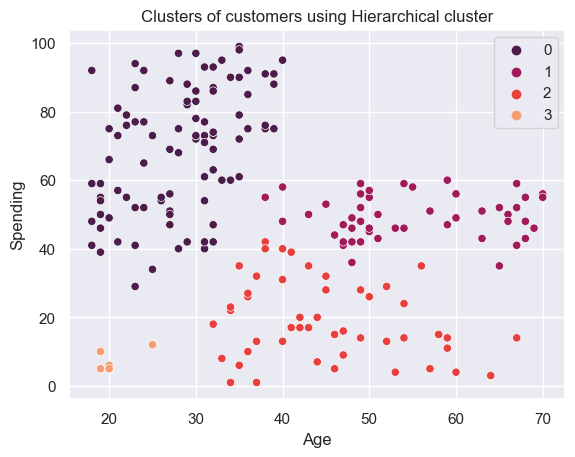

In [103]:
hcluster2 = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

hcluster2.fit(x2)
labels = hcluster2.labels_


sns.scatterplot(x = 'Age', y = 'Spending', data= mall_df, hue = labels, palette=sns.color_palette('rocket', 4))

plt.title('Clusters of customers using Hierarchical cluster')
plt.show()

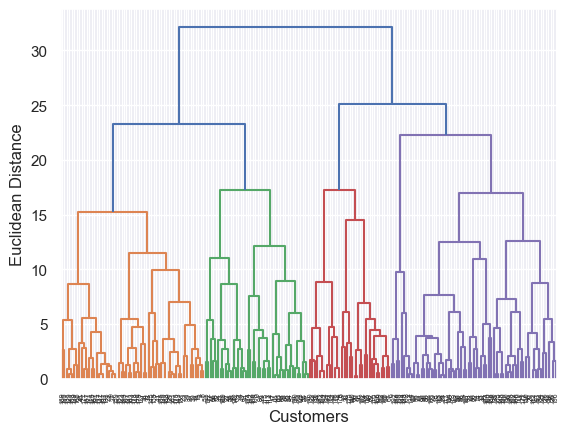

In [104]:
dist = distance_matrix(x2, x2)
z2 = hierarchy.linkage(dist, method = 'complete')
dendro = hierarchy.dendrogram(z2)

plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

### DB SCAN for Age and Spending

Text(0, 0.5, 'Distance')

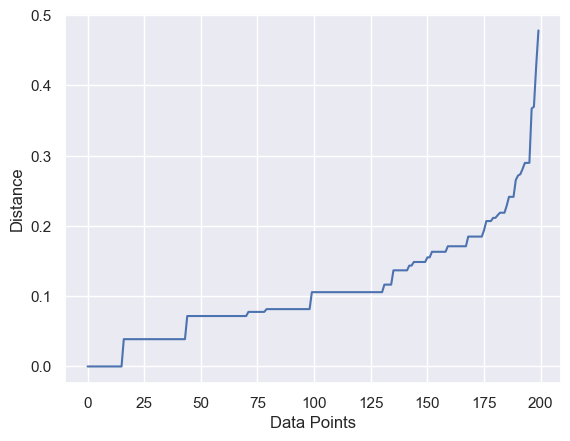

In [105]:
#Finding the optimal value for EPS
knn_model = NearestNeighbors(n_neighbors=2)
nbrs = knn_model.fit(x2)

distances, indices = nbrs.kneighbors(x2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')


Text(0, 0.5, 'Spending')

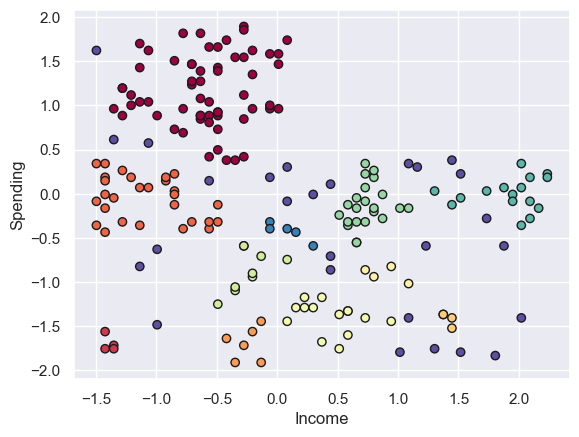

In [106]:
dbscan = DBSCAN(eps=0.25, min_samples=2 * x2.shape[1])
dbscan.fit(x2)
dbscan_predict = dbscan.fit_predict(x2)

# Visualize the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(dbscan_predict))))

# Visualize the clusters
plt.scatter(x2[:, 0], x2[:, 1], c=colors[dbscan_predict], edgecolors='k')
plt.xlabel('Income')
plt.ylabel('Spending')


## Clustering using Age , Income and Spending Score
<br/>

In [107]:
x3 = mall_df.iloc[: , 2:]

In [108]:
x3

Age  Income  Spending
0     19      15        39
1     21      15        81
2     20      16         6
3     23      16        77
4     31      17        40
..   ...     ...       ...
195   35     120        79
196   45     126        28
197   32     126        74
198   32     137        18
199   30     137        83

[200 rows x 3 columns]

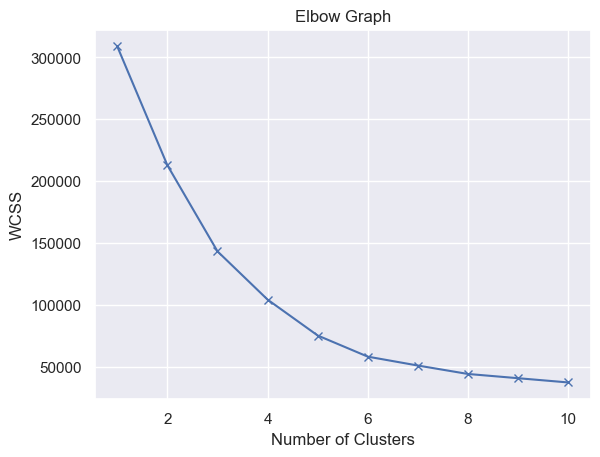

In [109]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',n_init = 10 ,max_iter= 100, random_state = 42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
#plot elbow graph
plt.plot(range(1,11), wcss , 'bx-')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()    

In [110]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(x3)
x3['kmeans_label'] = labels


In [111]:
import plotly.express as px

fig = px.scatter_3d(x3, x="Income", y="Spending", z="Age",
                    color='kmeans_label', size='kmeans_label')
fig.show()

In [112]:
hc = AgglomerativeClustering(n_clusters= 4, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(x3)
x3['hc_label'] = hc_labels


In [113]:
fig = px.scatter_3d(x3, x="Income", y="Spending", z="Age",
                    color='hc_label', size='hc_label')
fig.show()